## Clustering 

### K-Means

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#### Mass Shootings

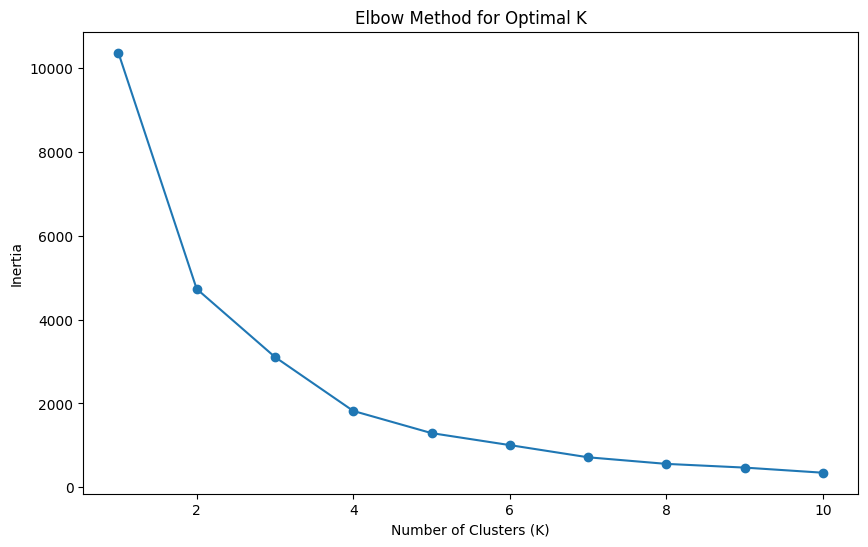

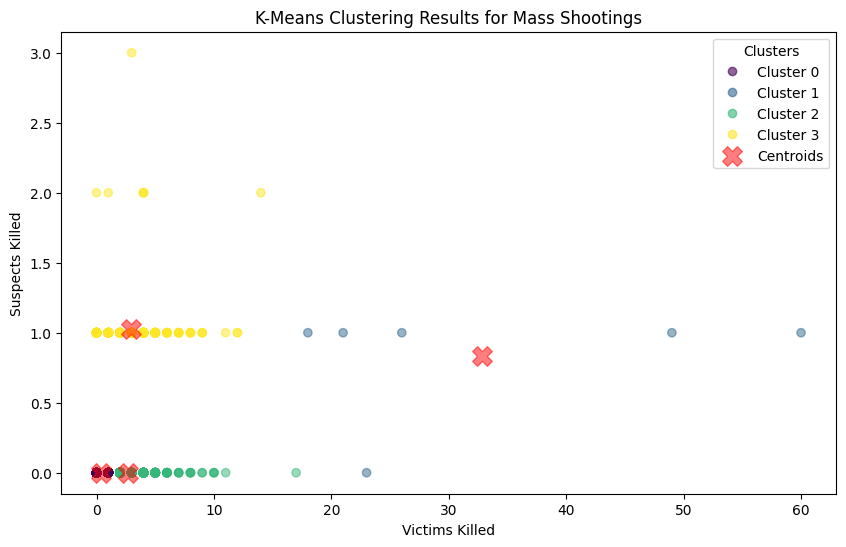

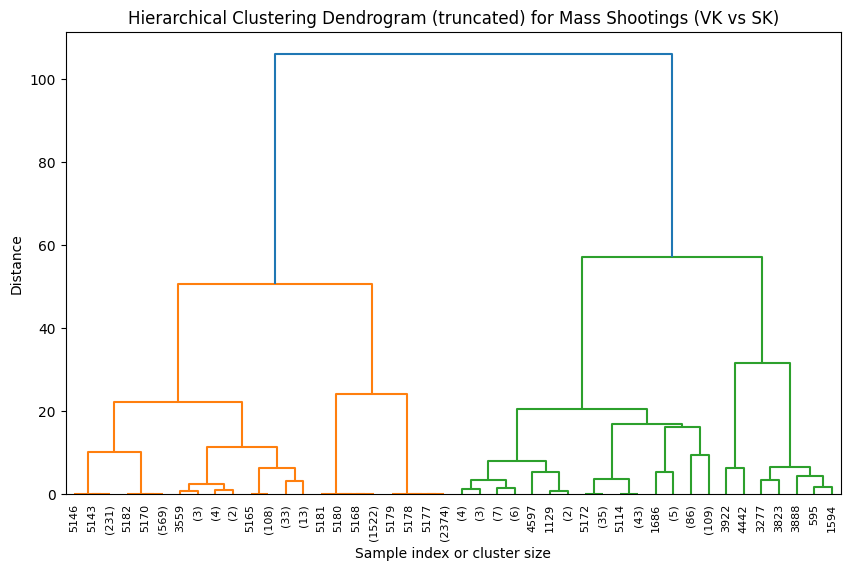

In [301]:
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VK_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VK vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VK_SK.png')
plt.show()

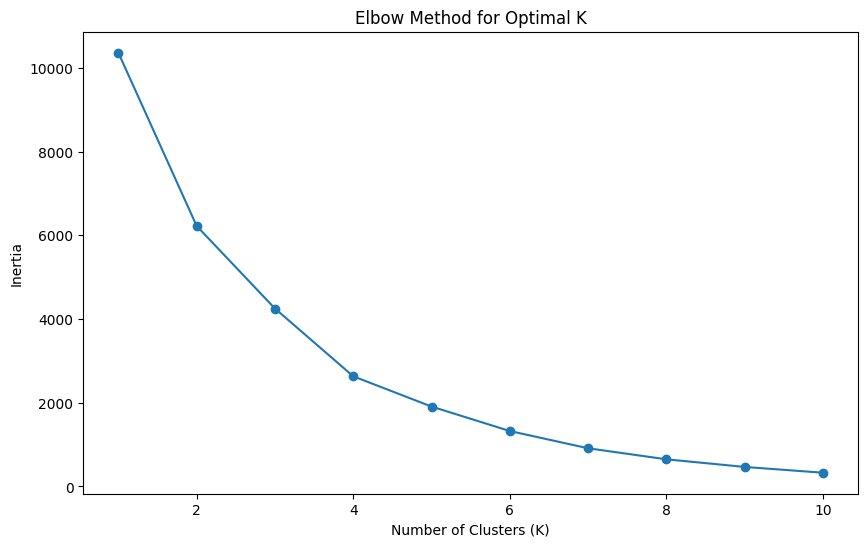

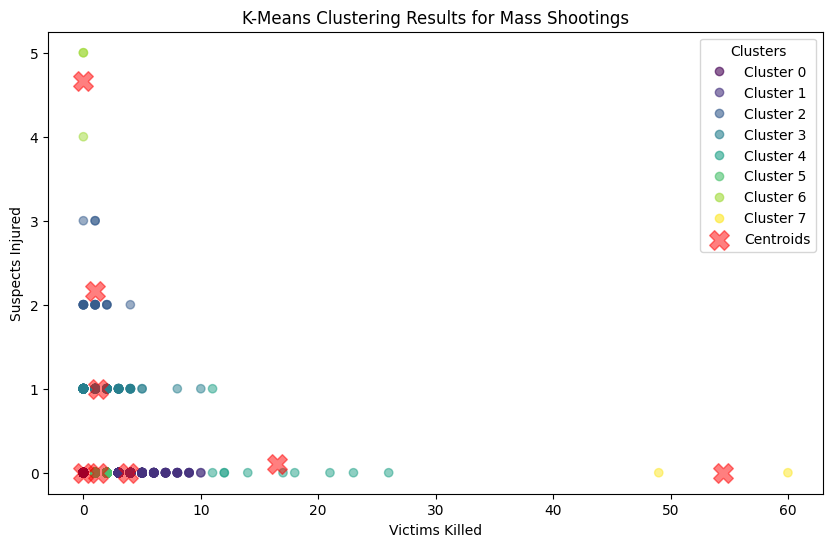

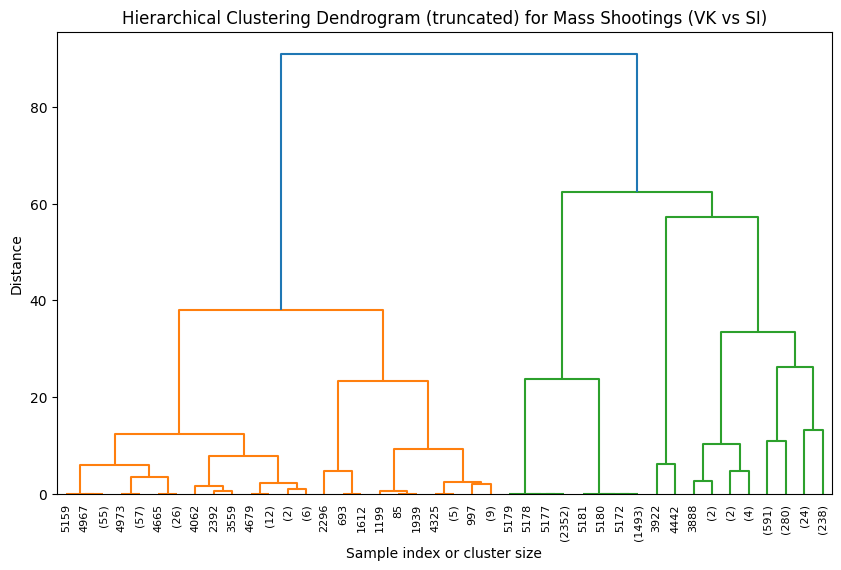

In [302]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 8 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VK_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VK vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VK_SI.png')
plt.show()

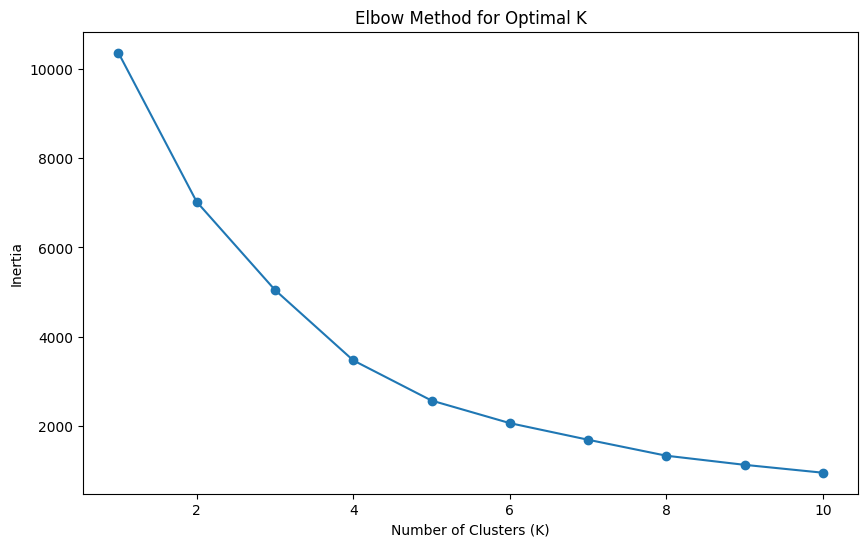

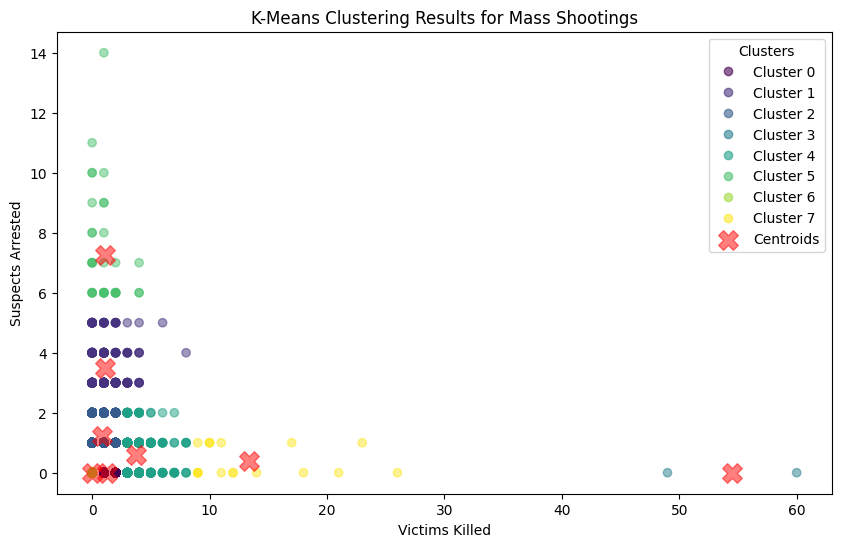

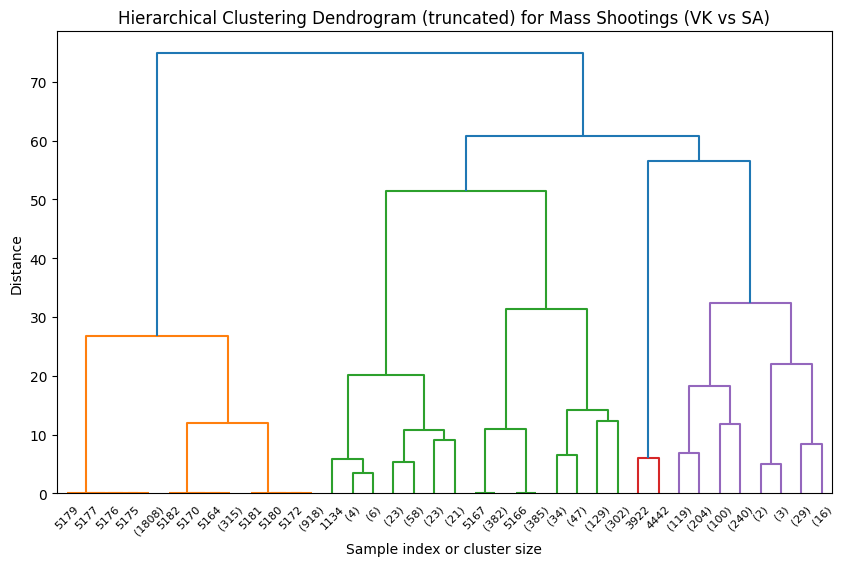

In [303]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 8 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VK_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VK vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VK_SA.png')
plt.show()

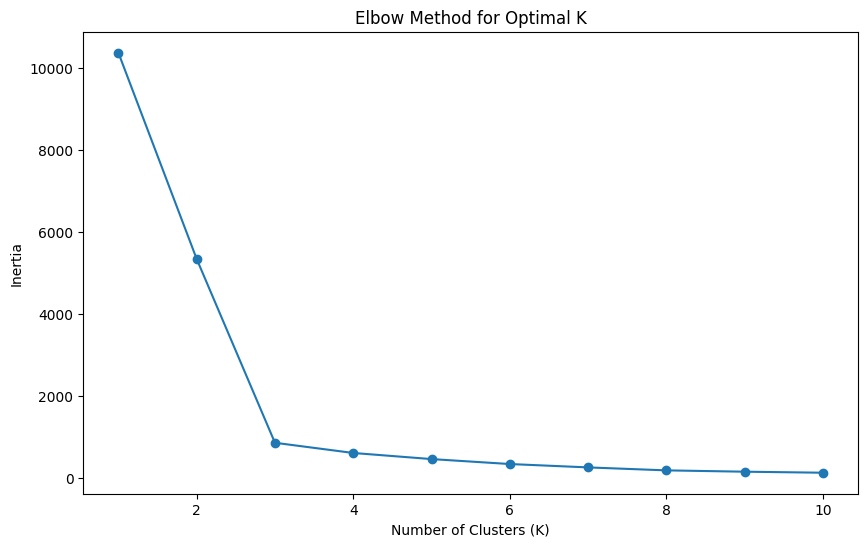

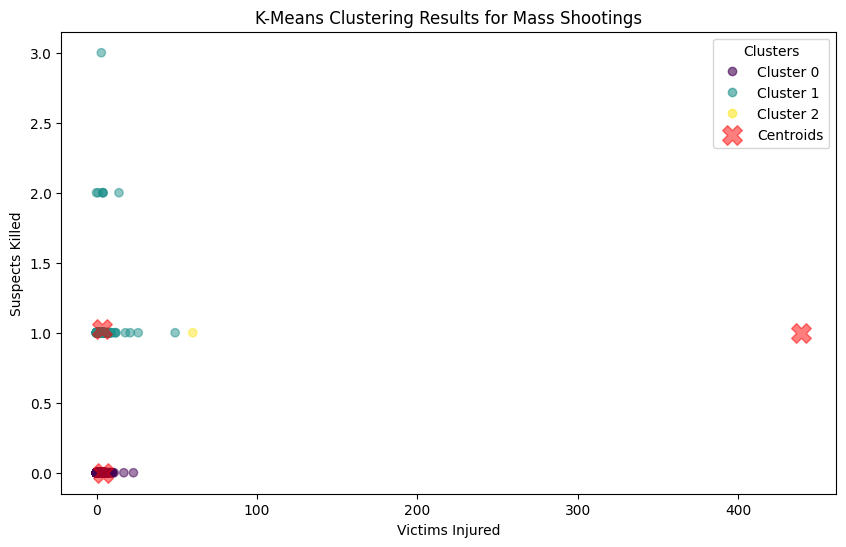

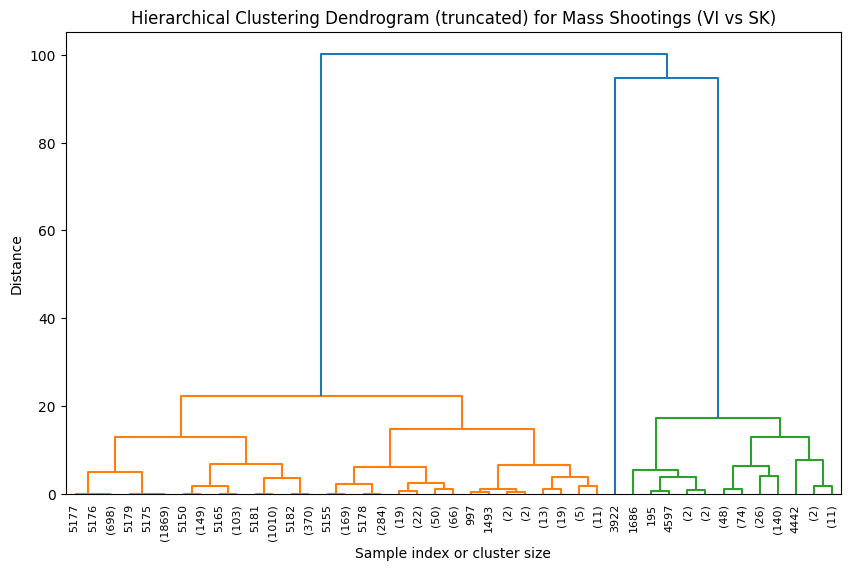

In [304]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VI_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VI vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VI_SK.png')
plt.show()

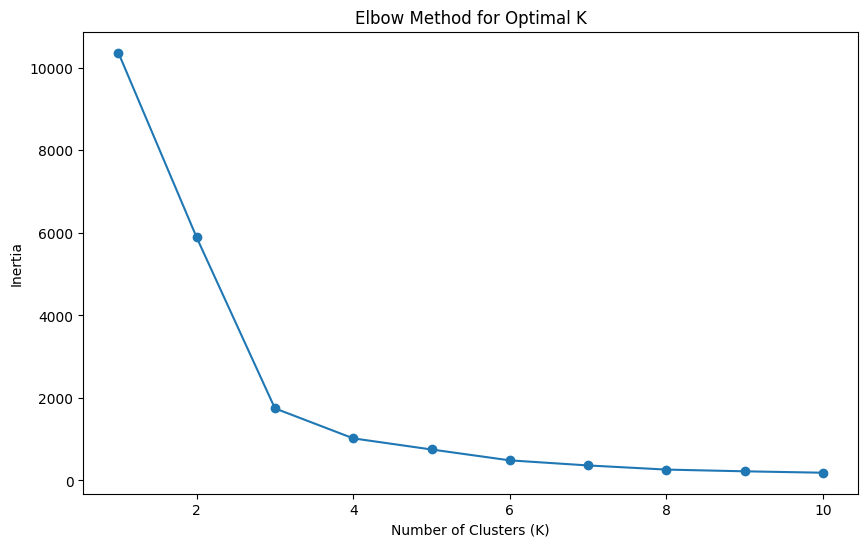

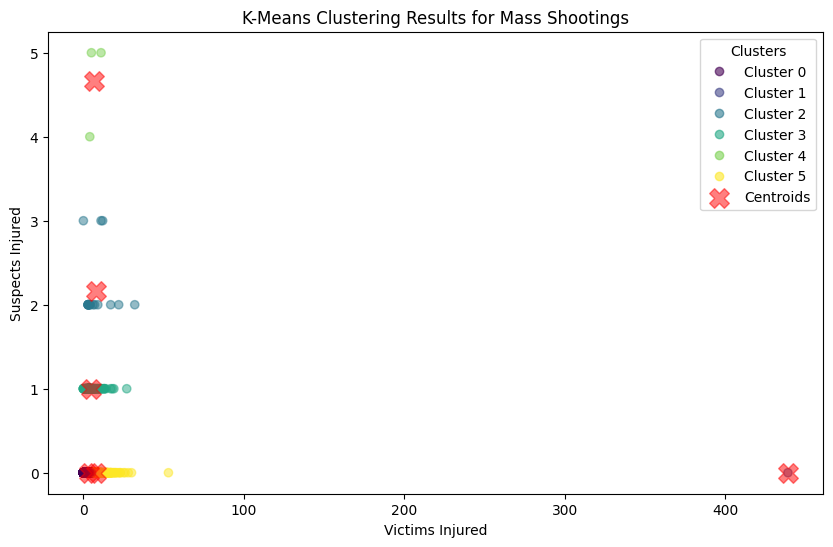

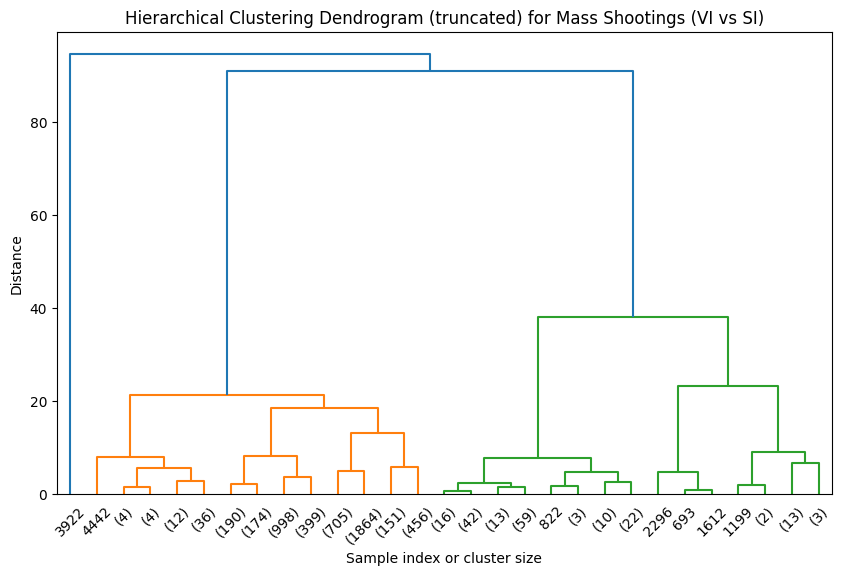

In [305]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 6 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VI_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VI vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VI_SI.png')
plt.show()

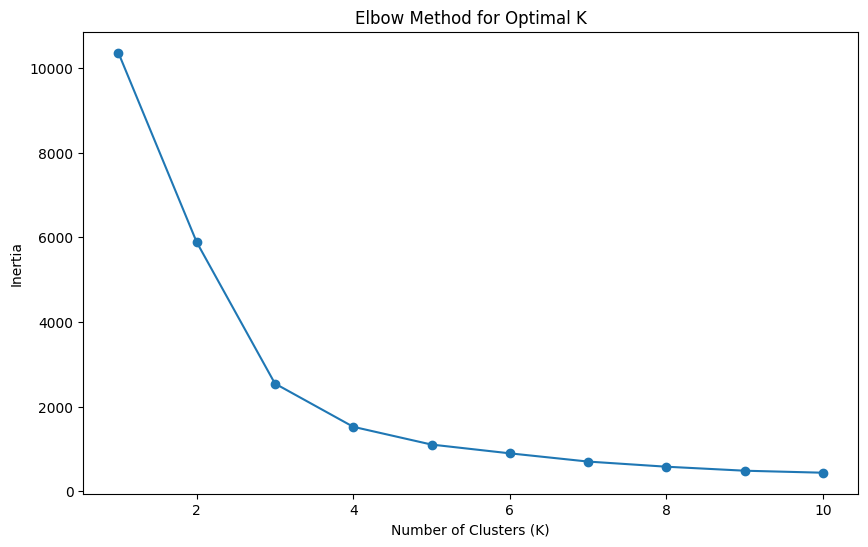

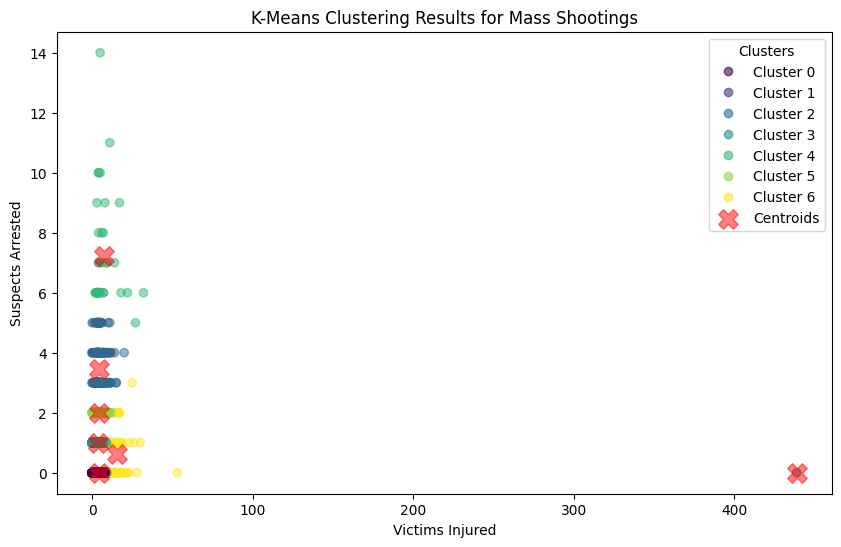

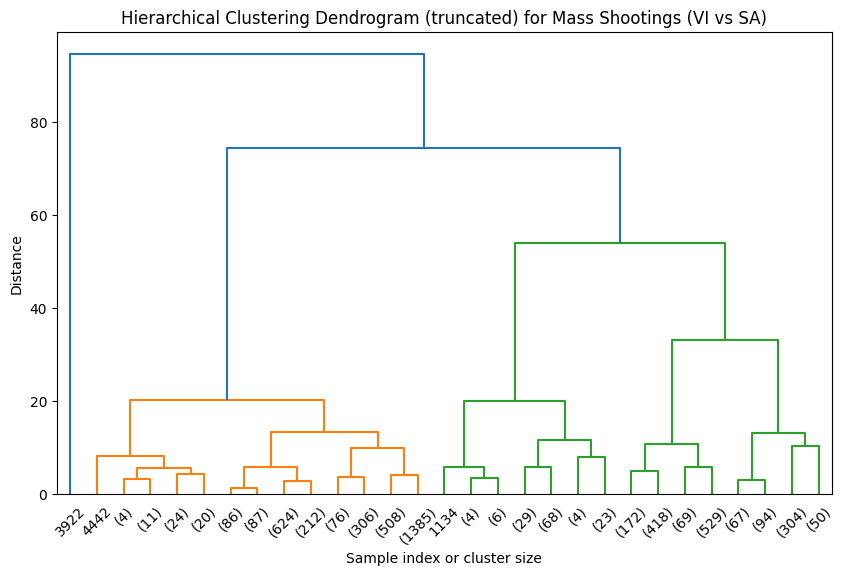

In [306]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 7 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Mass Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/mass_shootings_VI_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Mass Shootings (VI vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/mass_shootings_hc_VI_SA.png')
plt.show()

### School Shootings

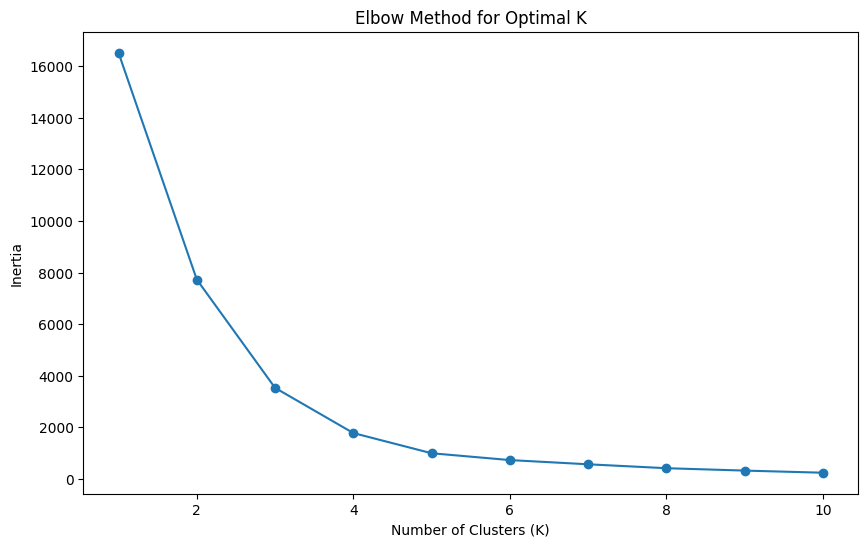

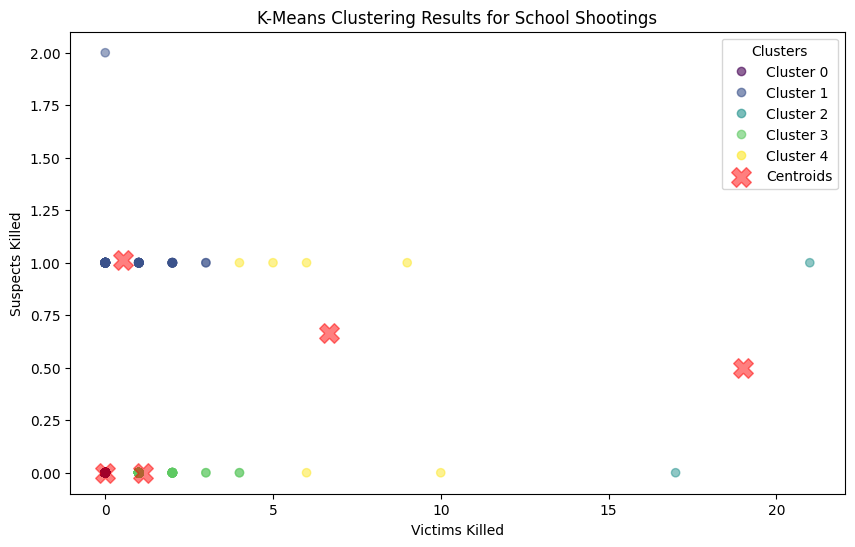

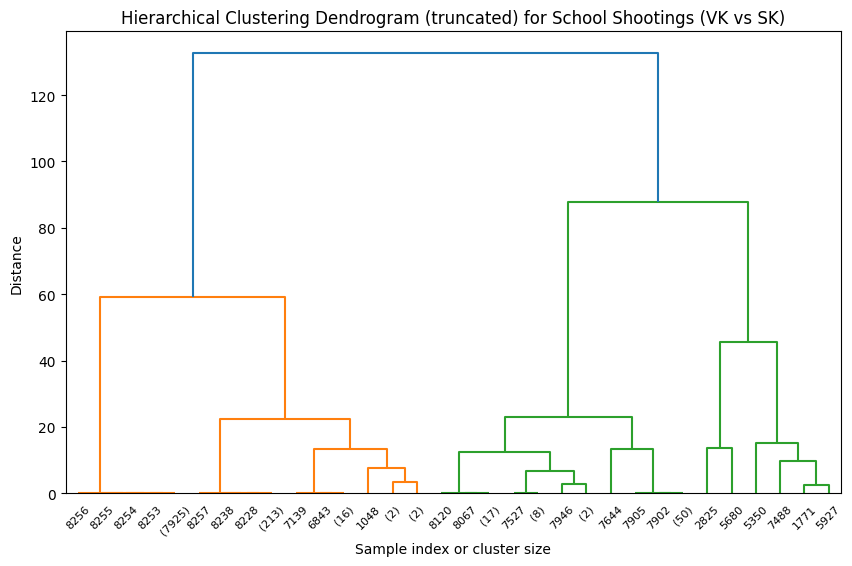

In [307]:
df = pd.read_csv("gunviolencearchive_school_shooting.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VK_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VK vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VK_SK.png')
plt.show()

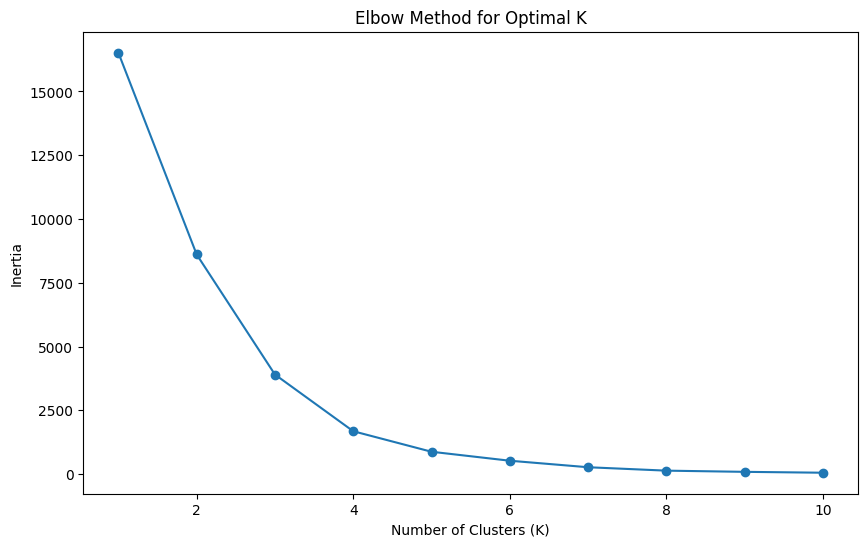

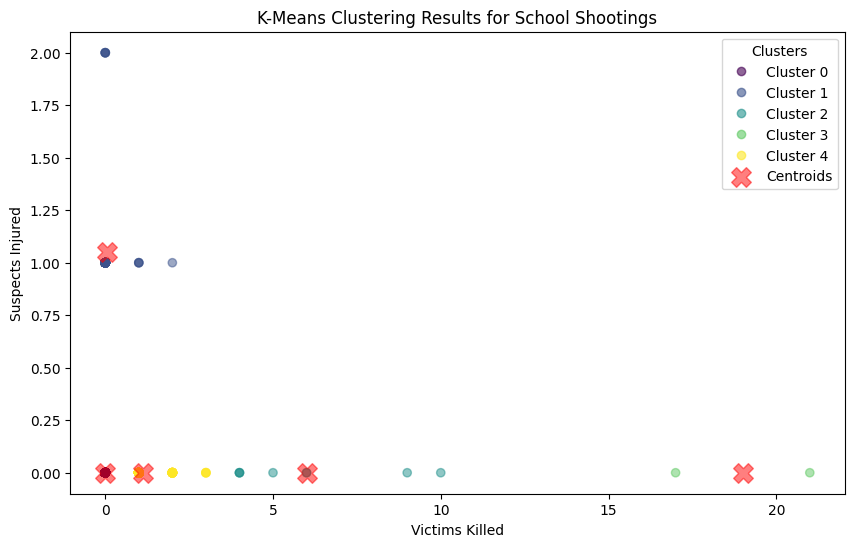

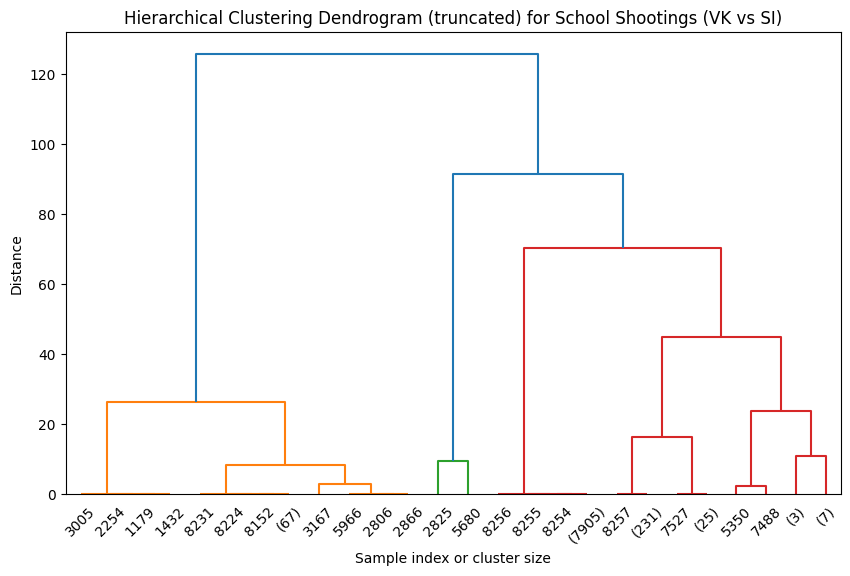

In [308]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VK_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VK vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VK_SI.png')
plt.show()

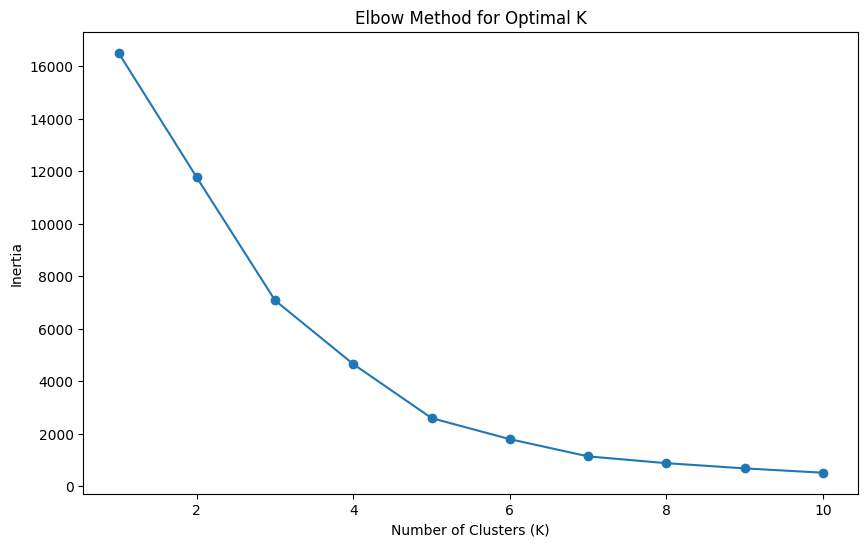

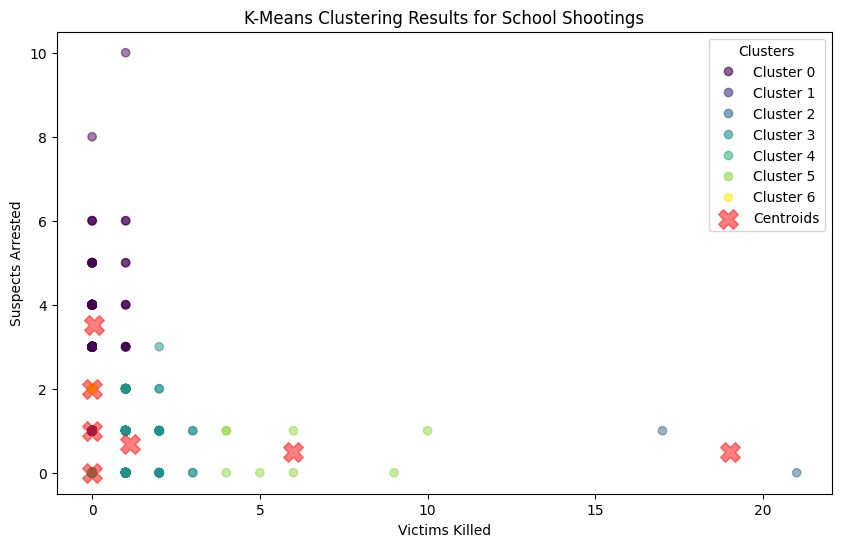

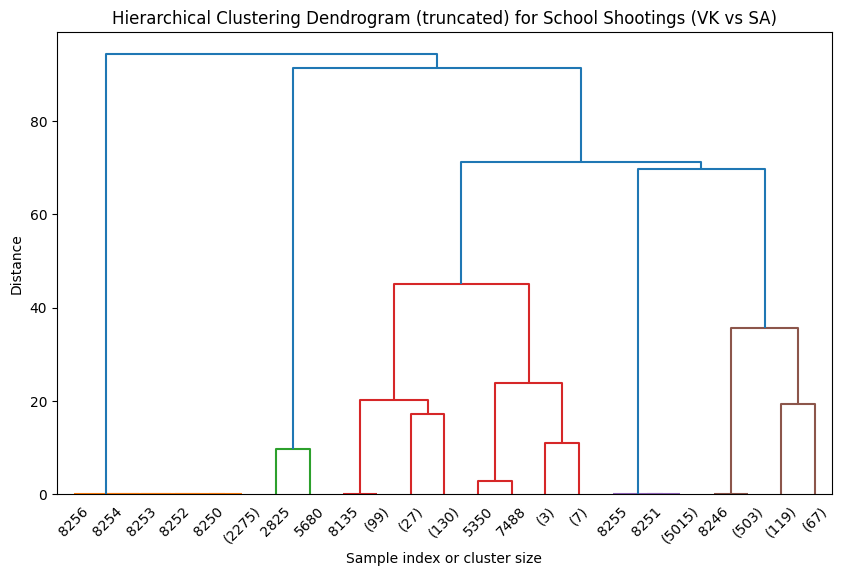

In [309]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 7 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VK_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VK vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VK_SA.png')
plt.show()

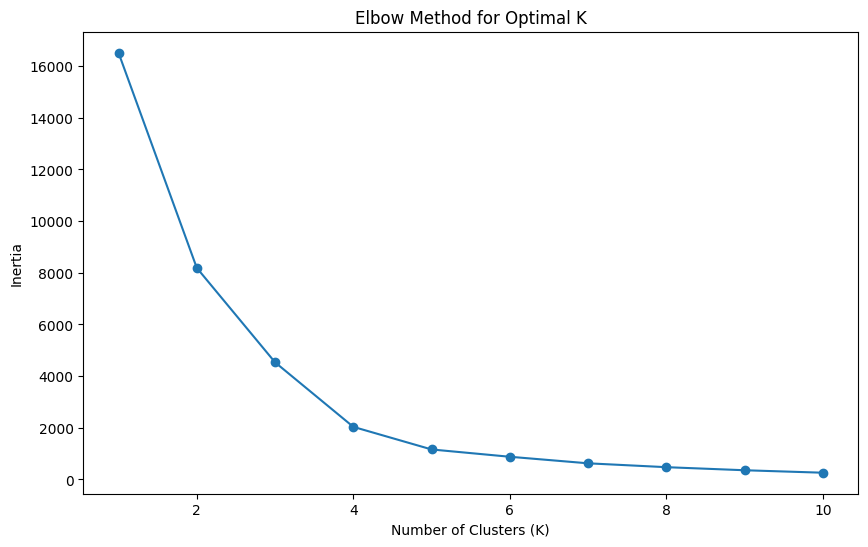

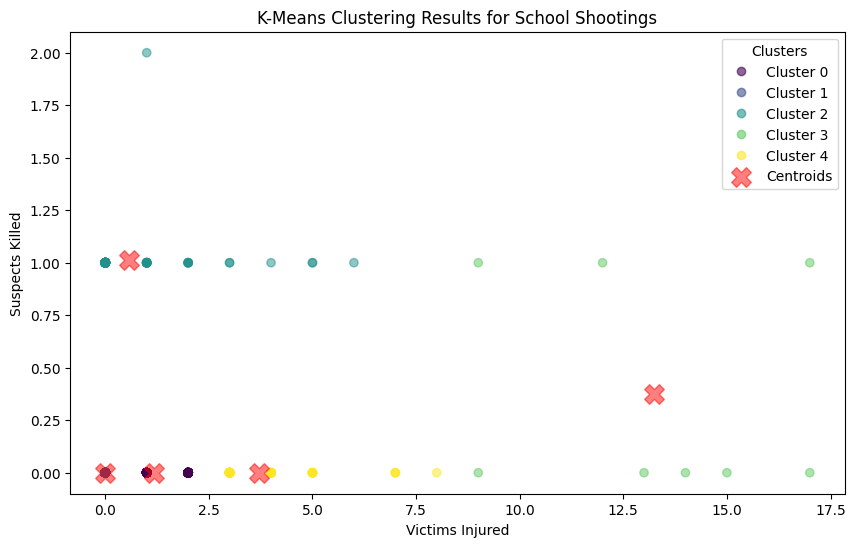

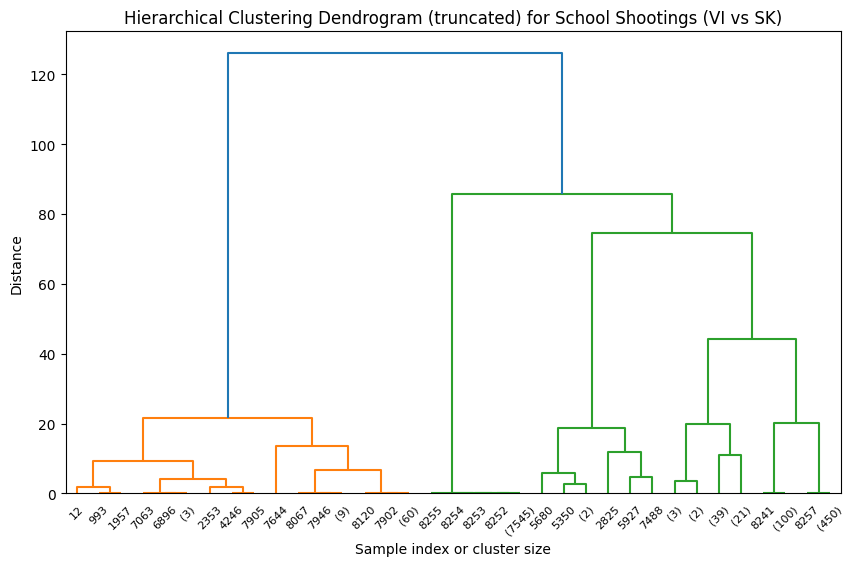

In [310]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VI_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VI vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VI_SK.png')
plt.show()

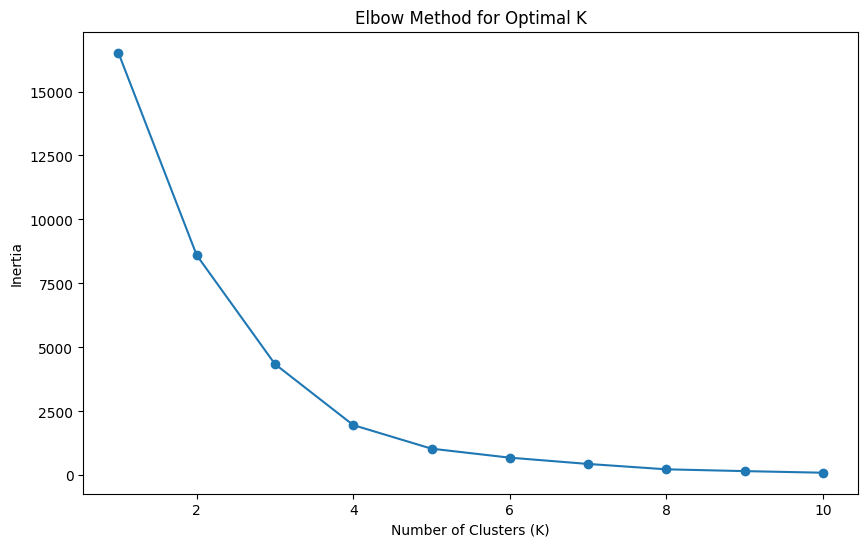

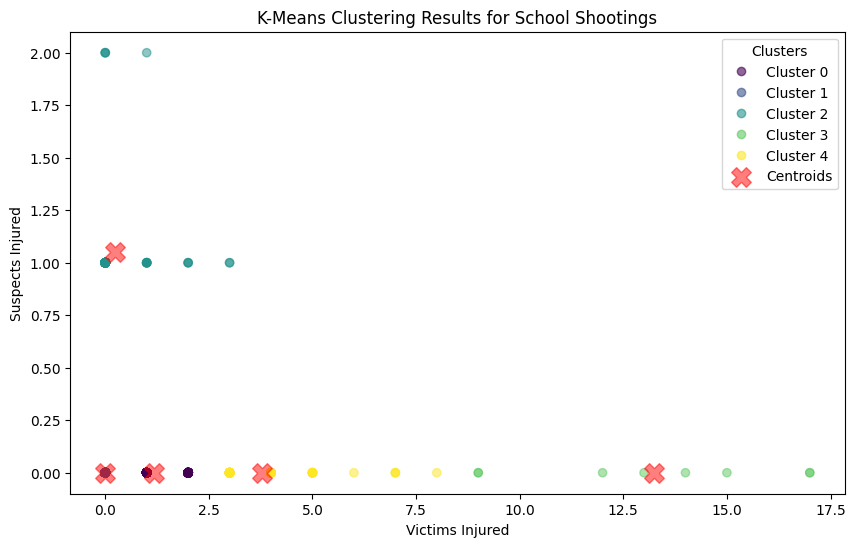

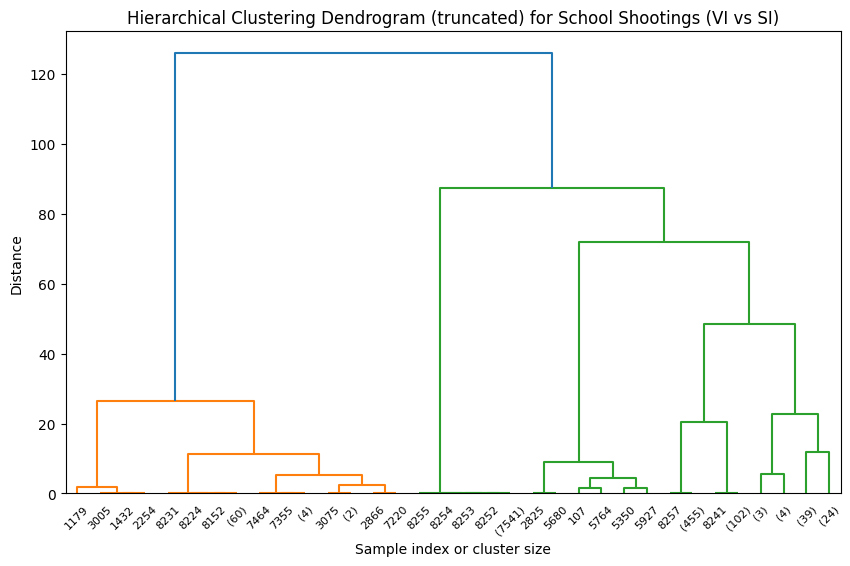

In [311]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VI_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VI vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VI_SI.png')
plt.show()

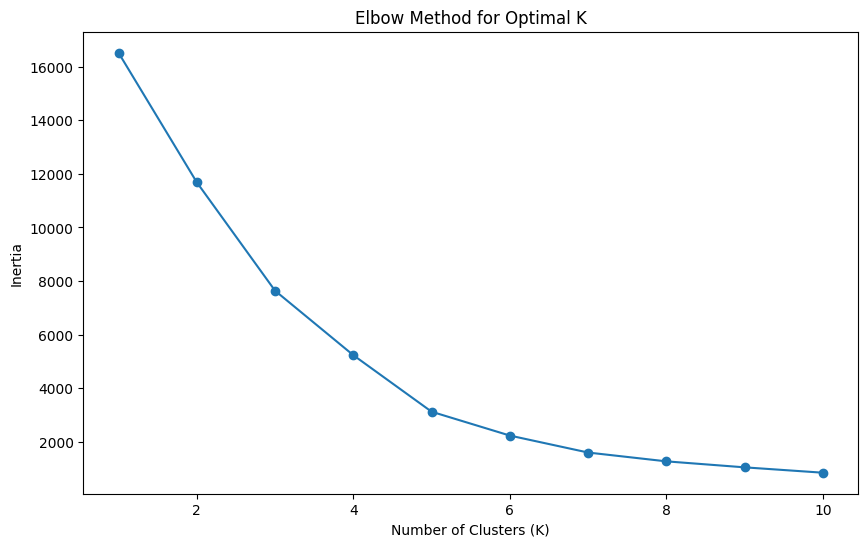

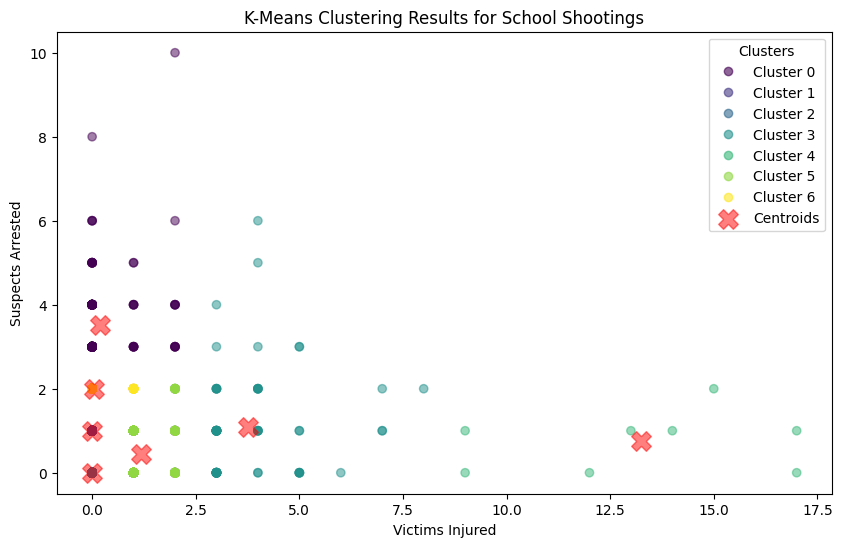

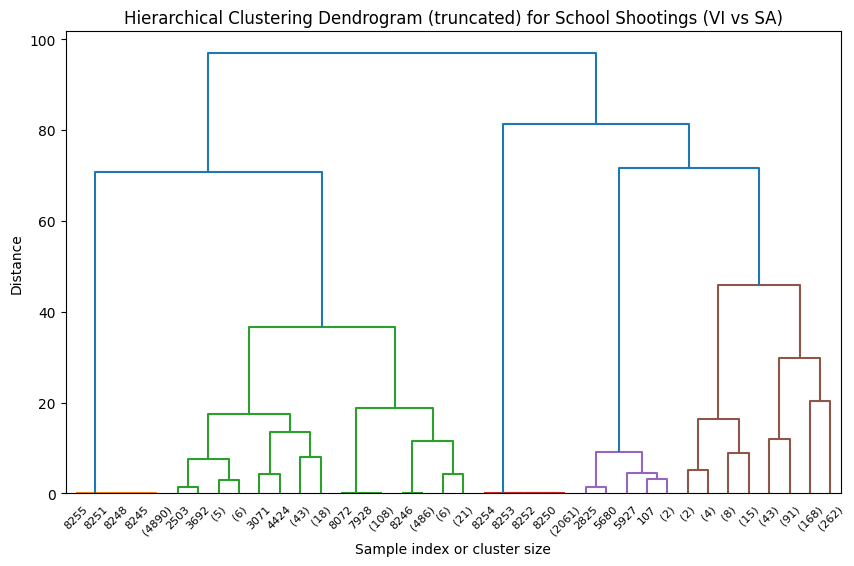

In [312]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 7 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for School Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/school_shootings_VI_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for School Shootings (VI vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/school_shootings_hc_VI_SA.png')
plt.show()

#### Officer Involved

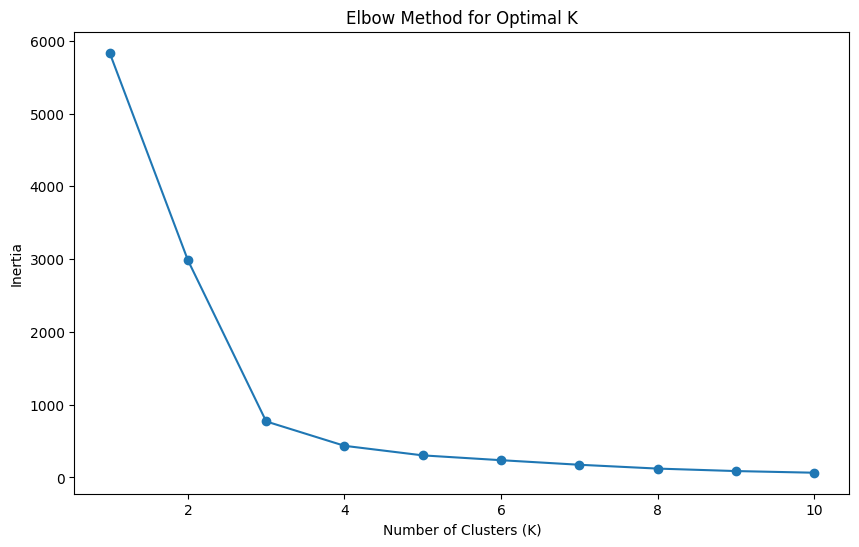

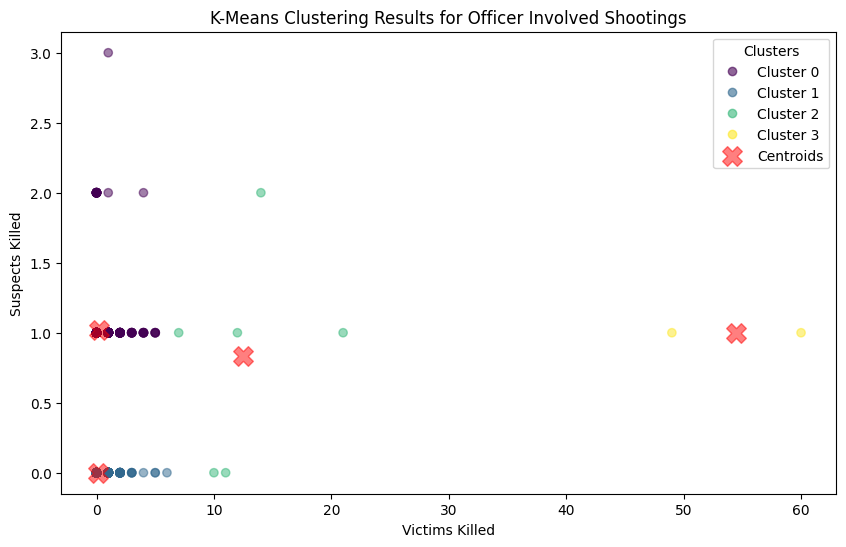

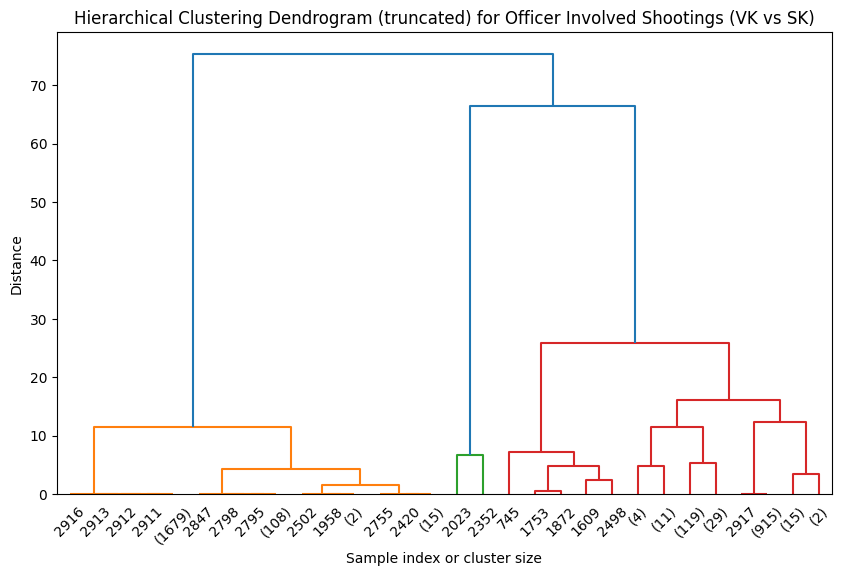

In [313]:
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VK_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VK vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VK_SK.png')
plt.show()

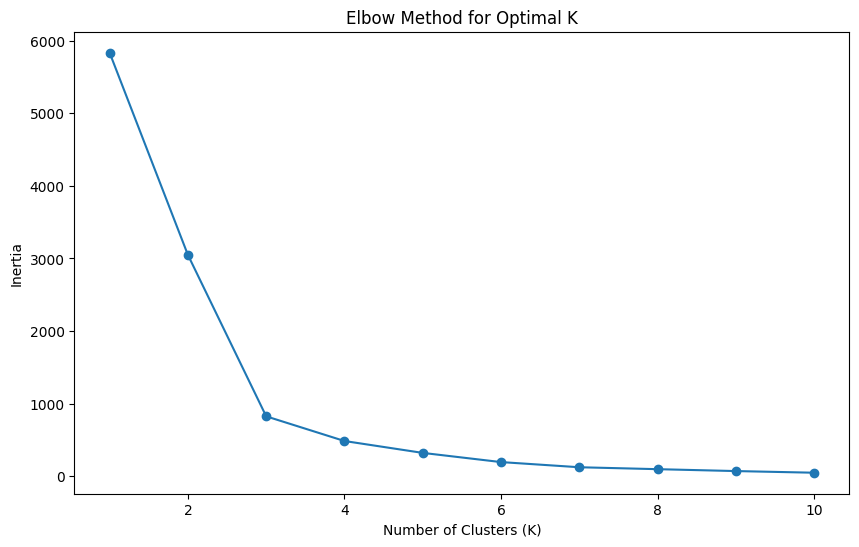

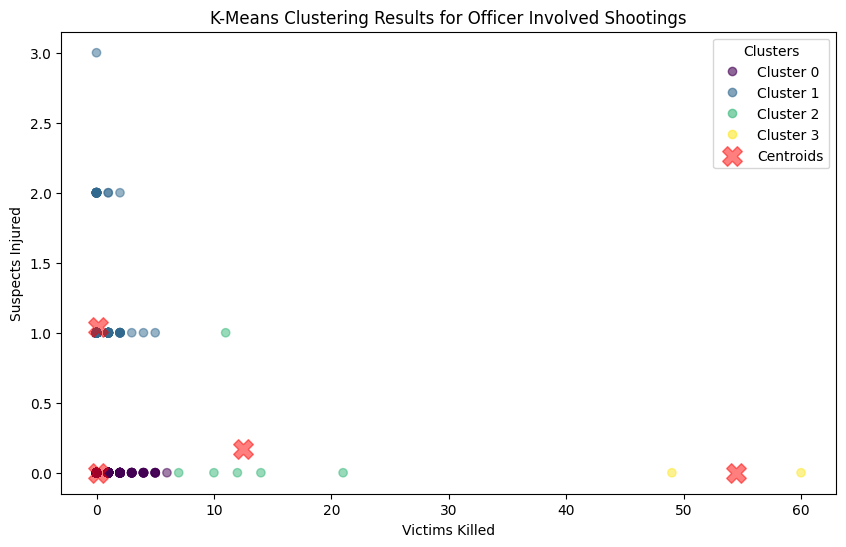

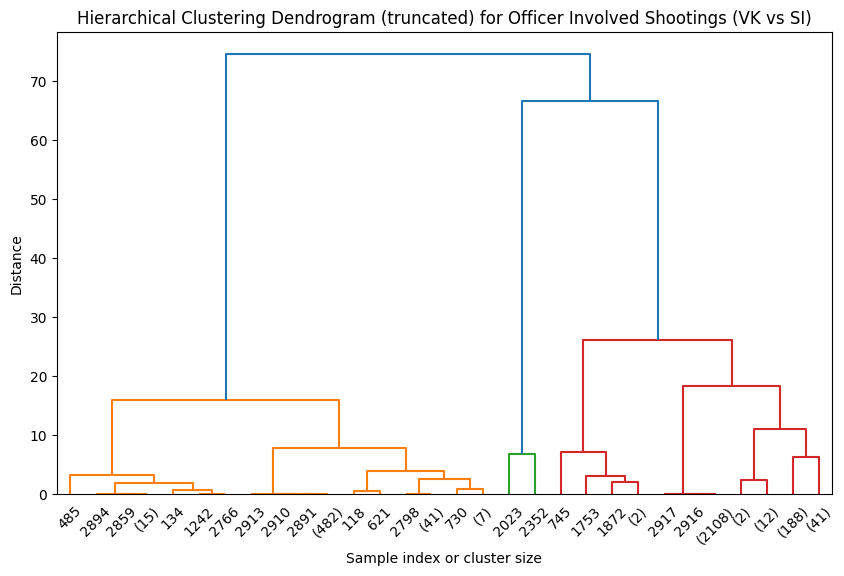

In [314]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VK_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VK vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VK_SI.png')
plt.show()


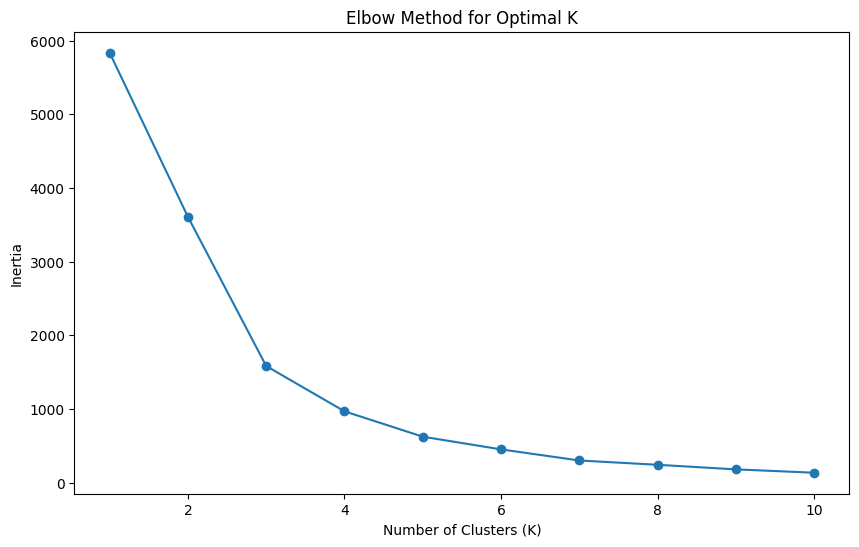

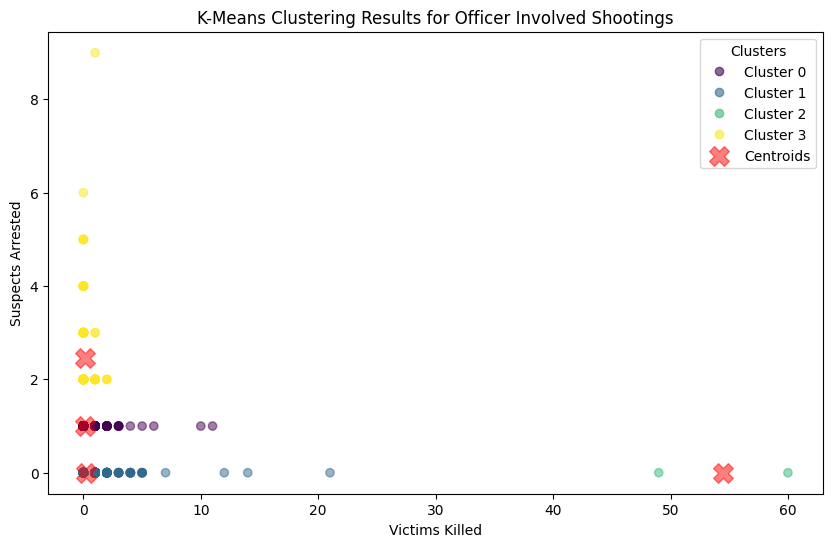

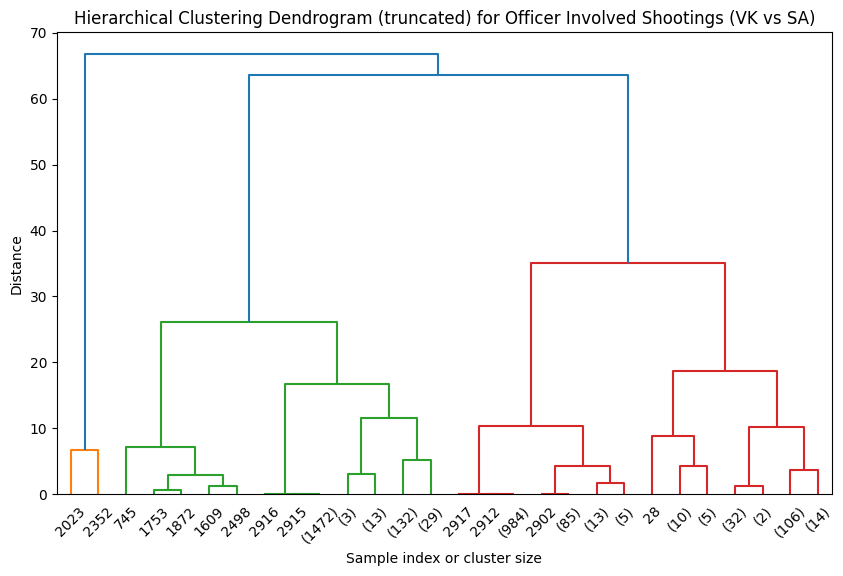

In [315]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VK_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VK vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VK_SA.png')
plt.show()

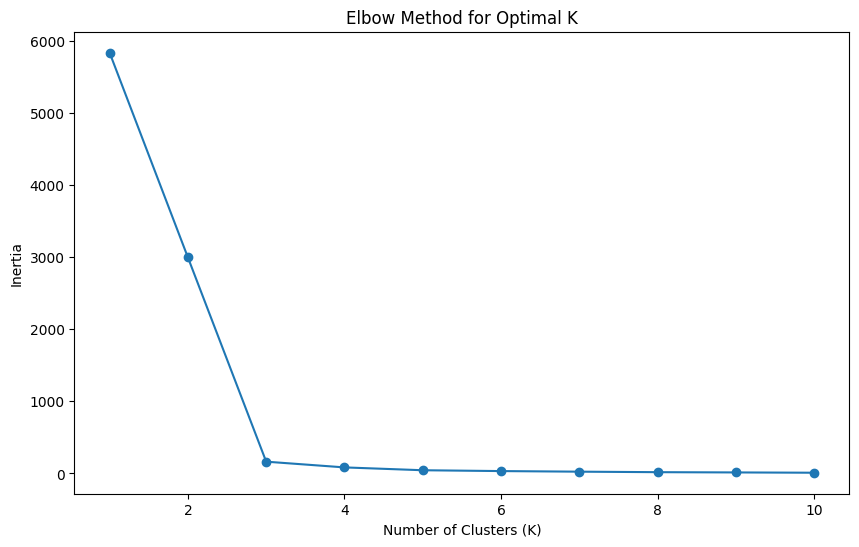

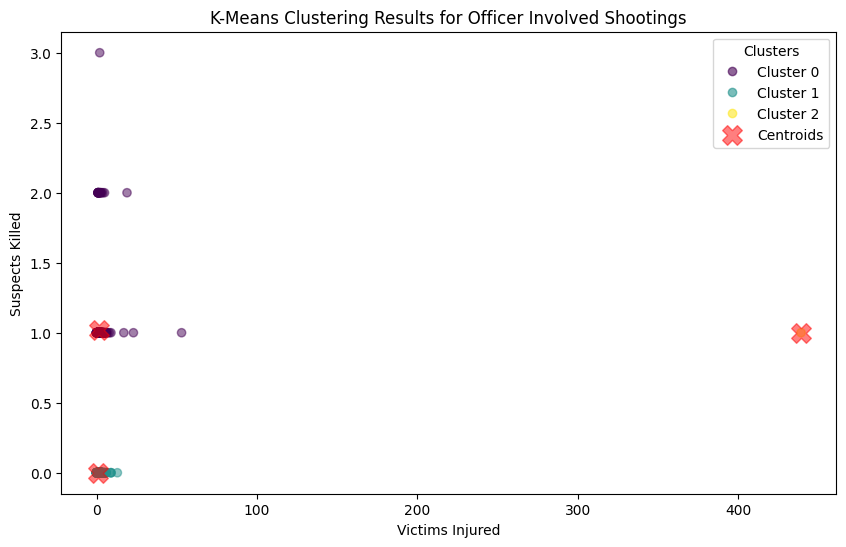

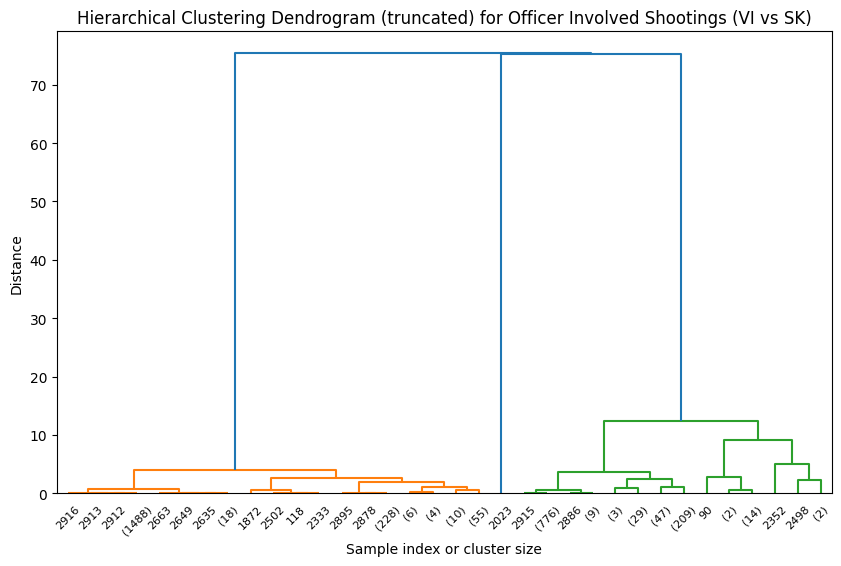

In [316]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VI_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VI vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VI_SK.png')
plt.show()

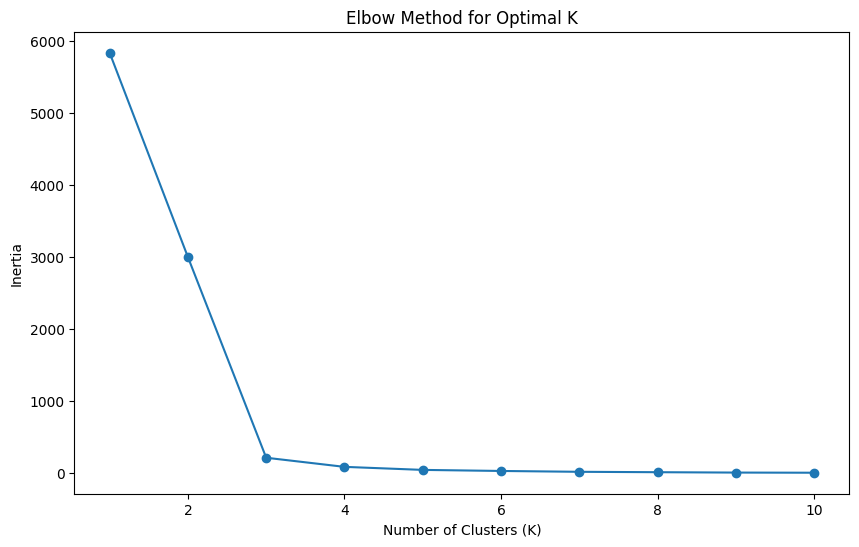

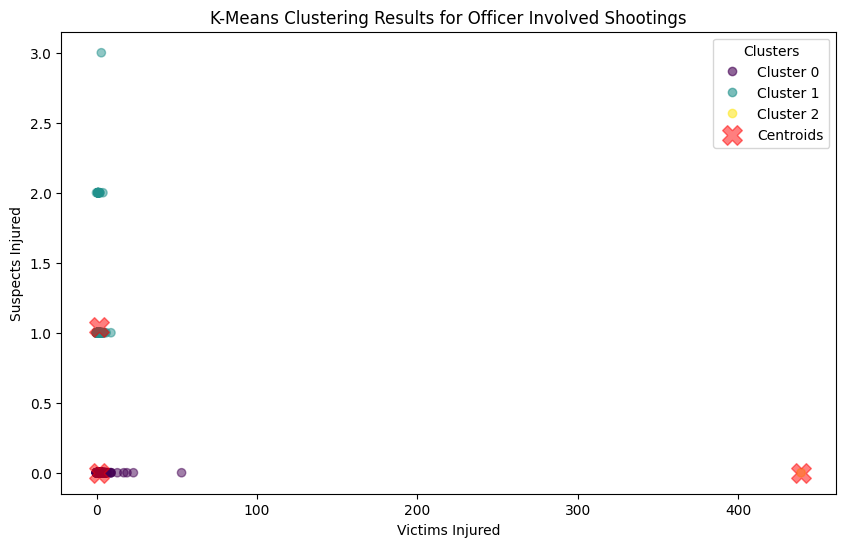

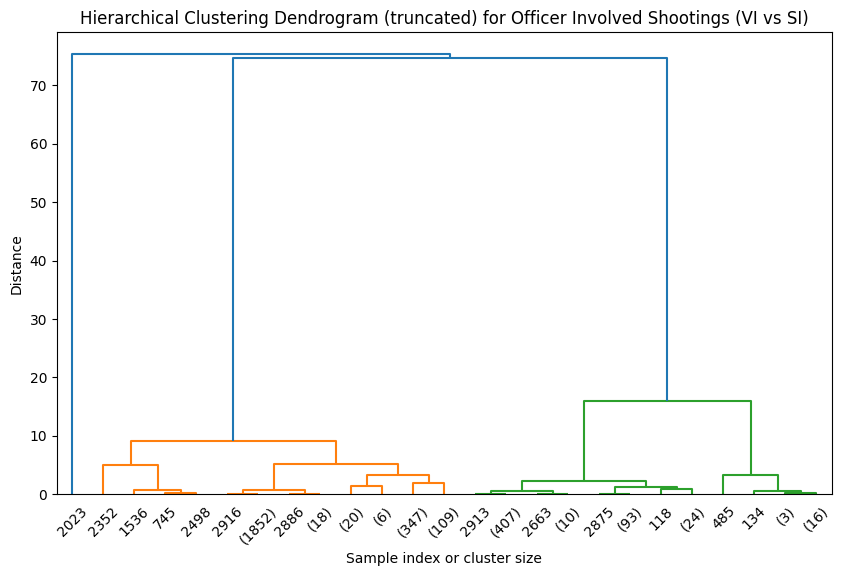

In [317]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VI_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VI vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VI_SI.png')
plt.show()


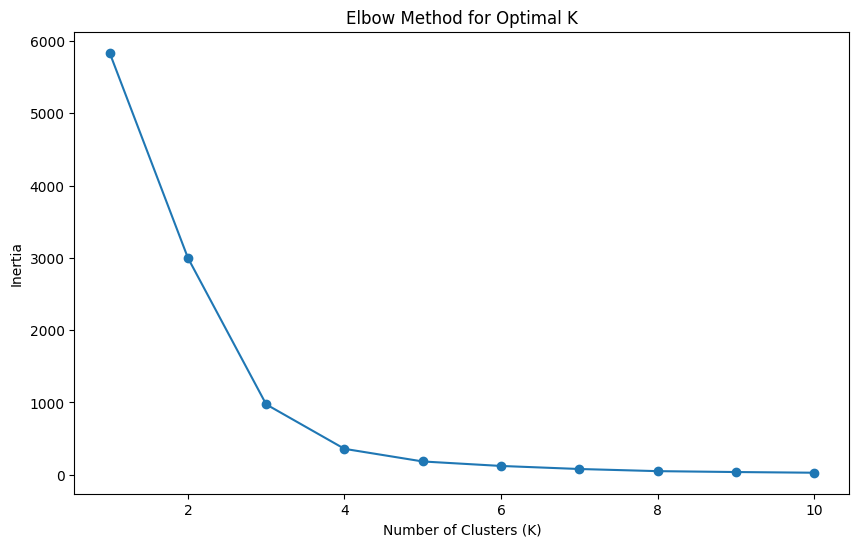

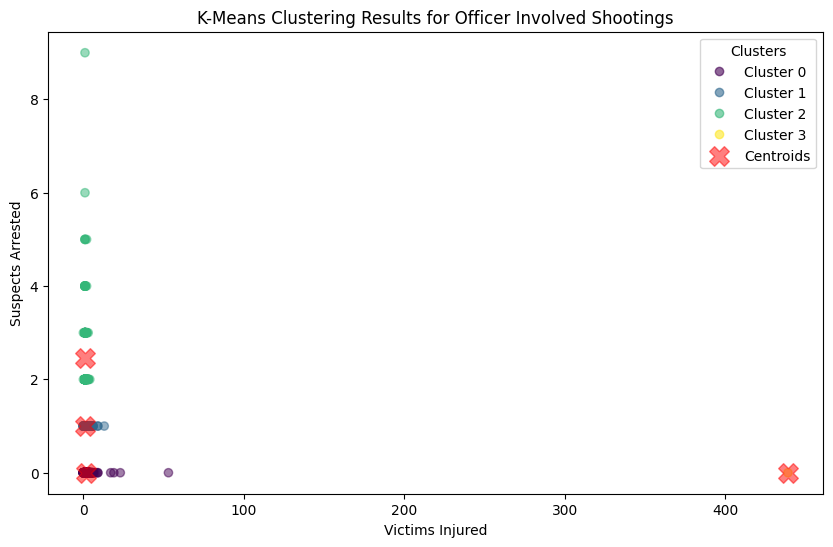

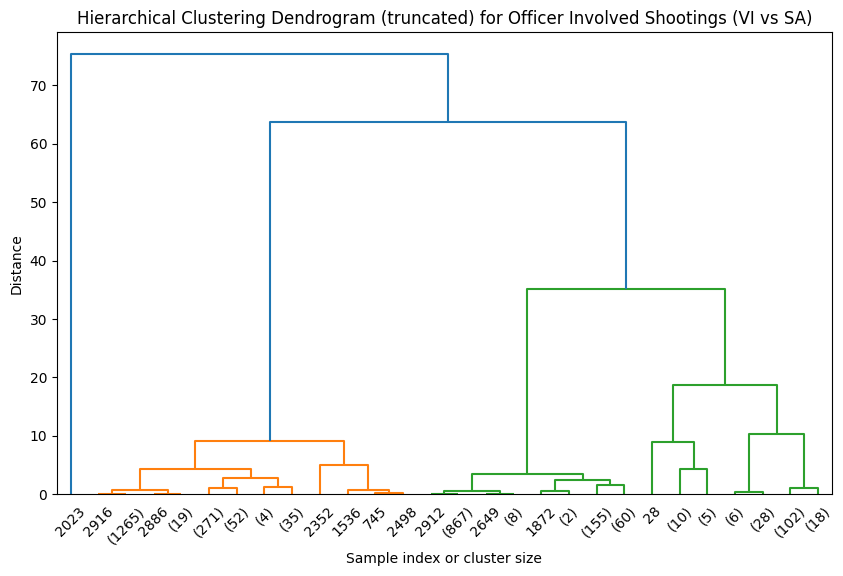

In [318]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Officer Involved Shootings')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/officer_involved_VI_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Officer Involved Shootings (VI vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/officer_involved_hc_VI_SA.png')
plt.show()

#### Accidental Deaths

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


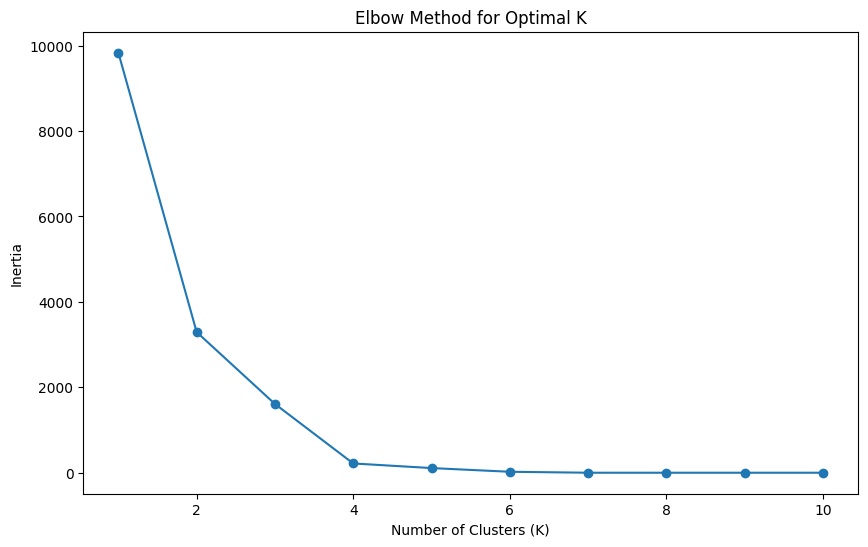

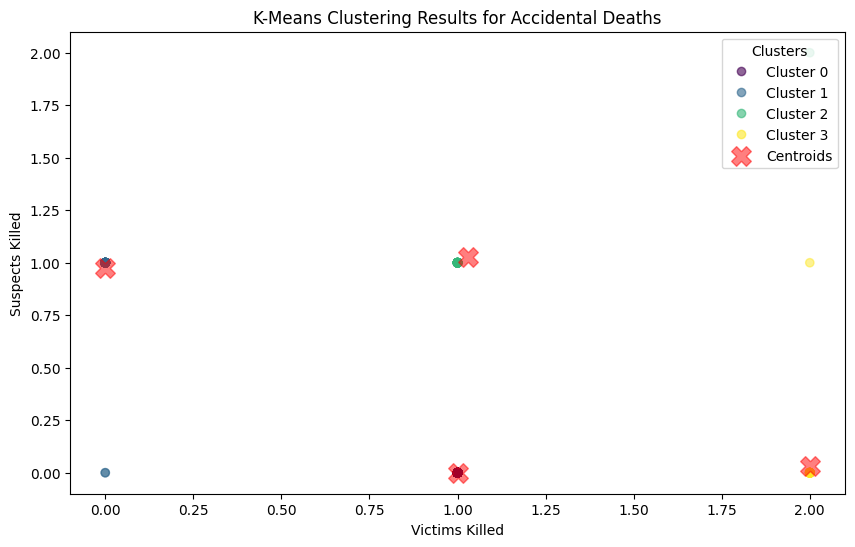

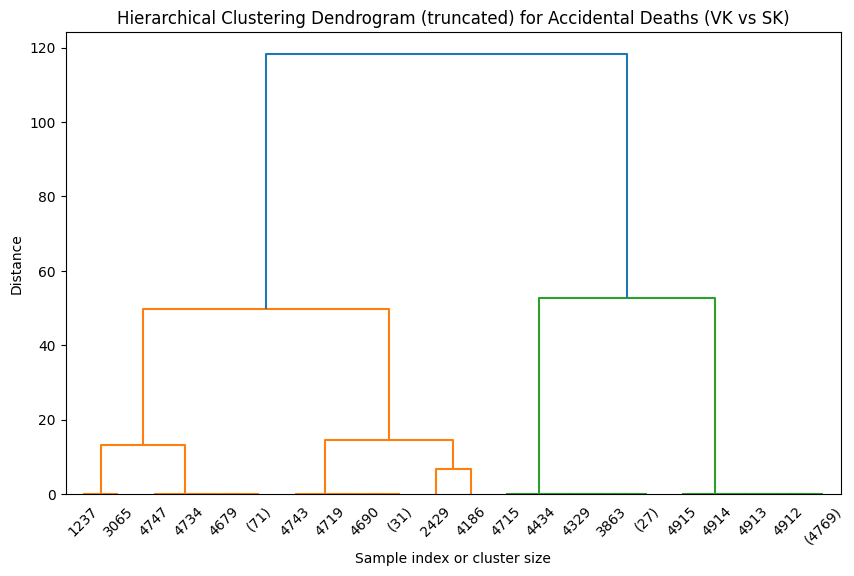

In [319]:
df = pd.read_csv("gunviolencearchive_accidental_deaths.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VK_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VK vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VK_SK.png')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


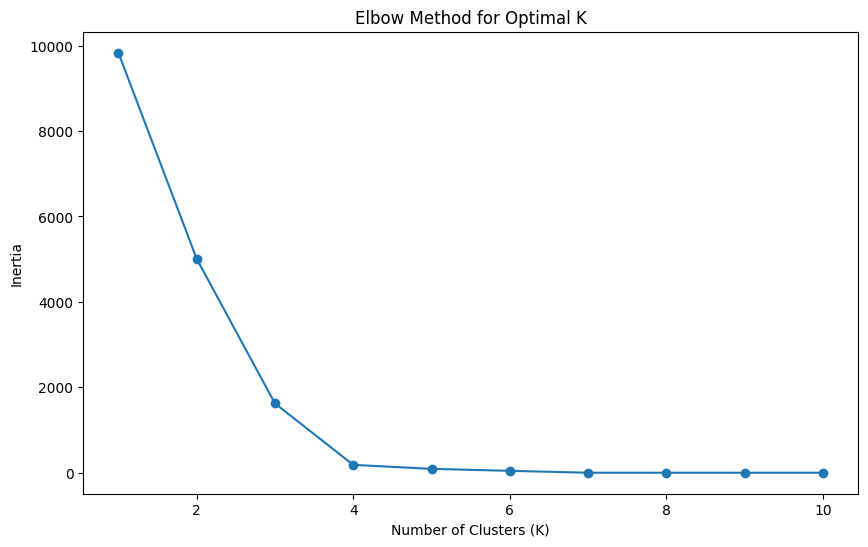

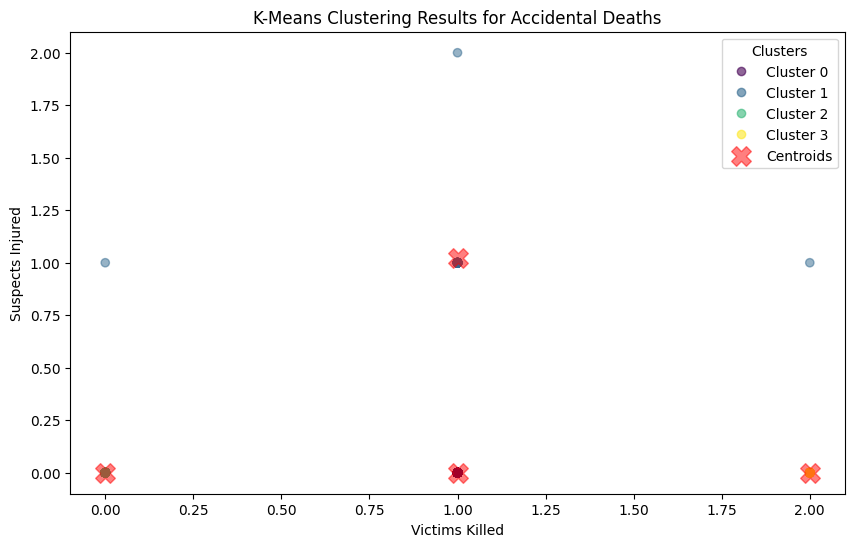

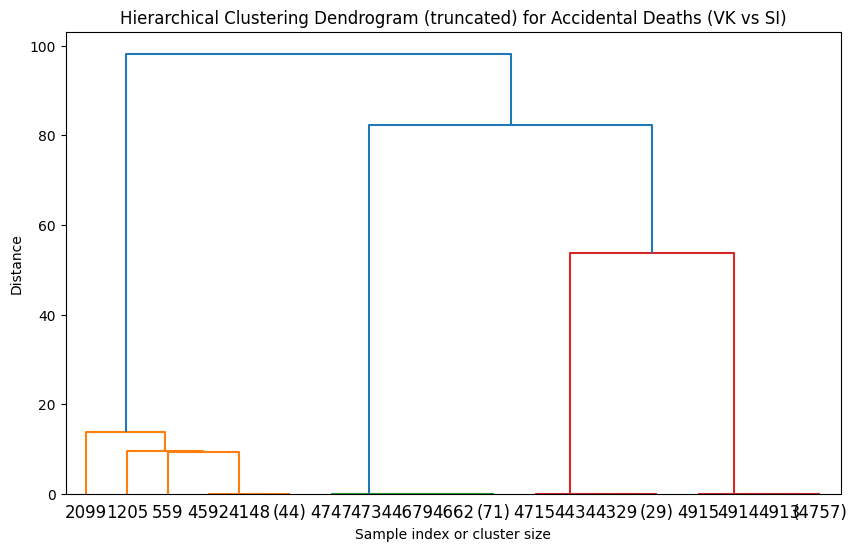

In [320]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VK_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VK vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VK_SI.png')
plt.show()

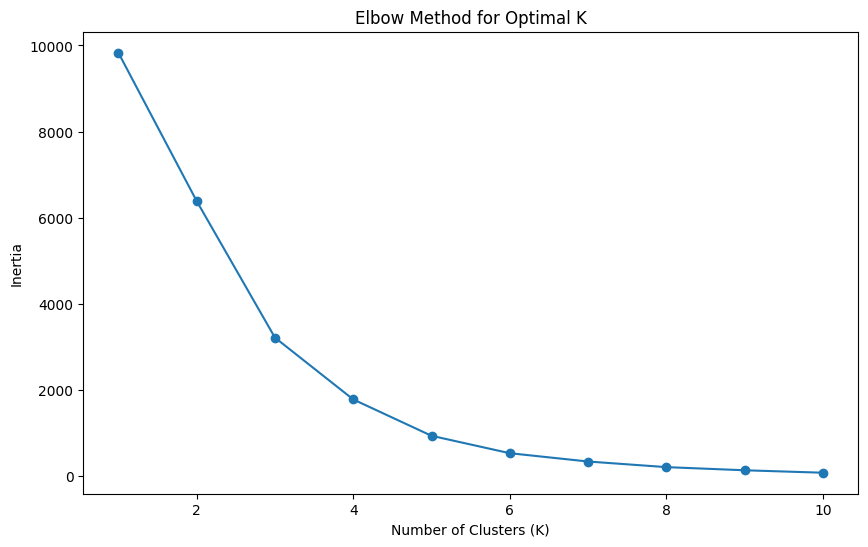

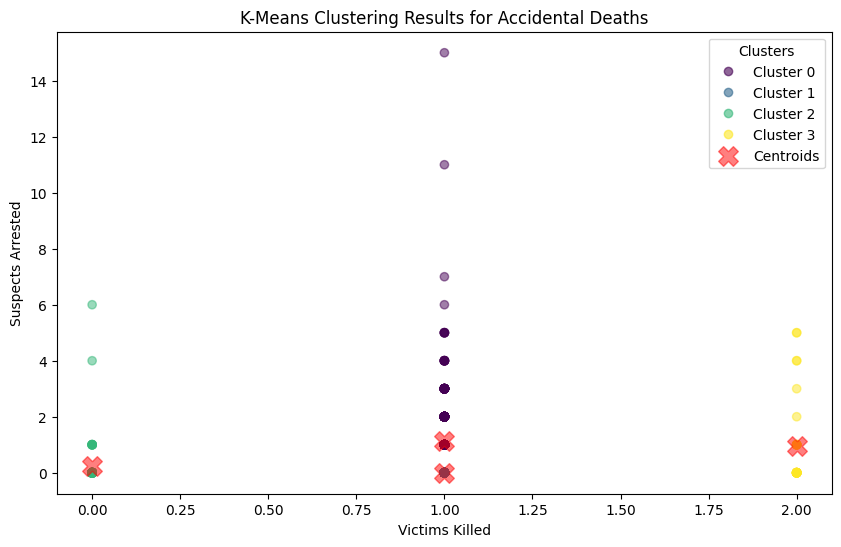

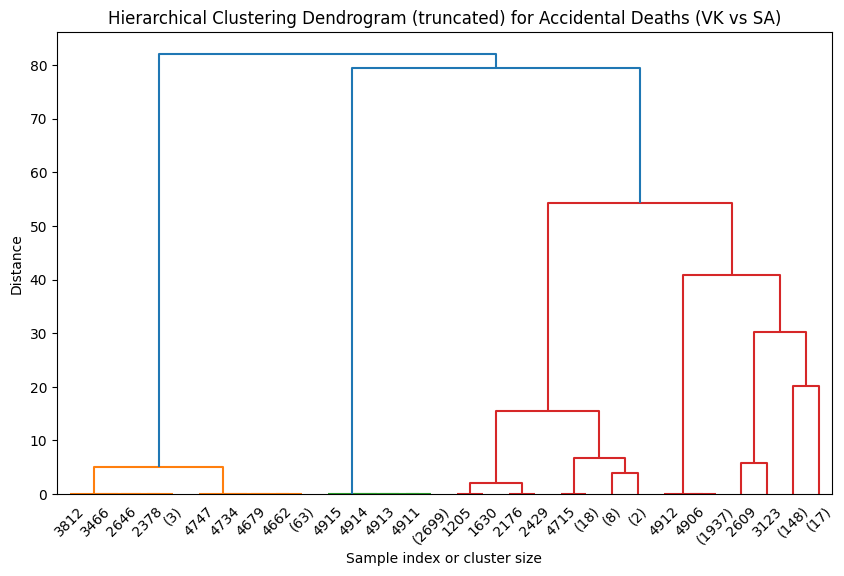

In [321]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VK_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VK vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VK_SA.png')
plt.show()

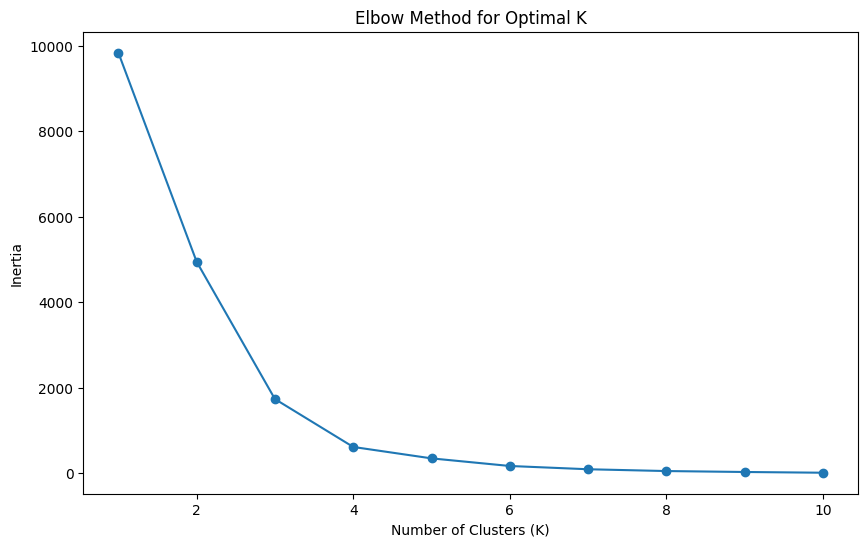

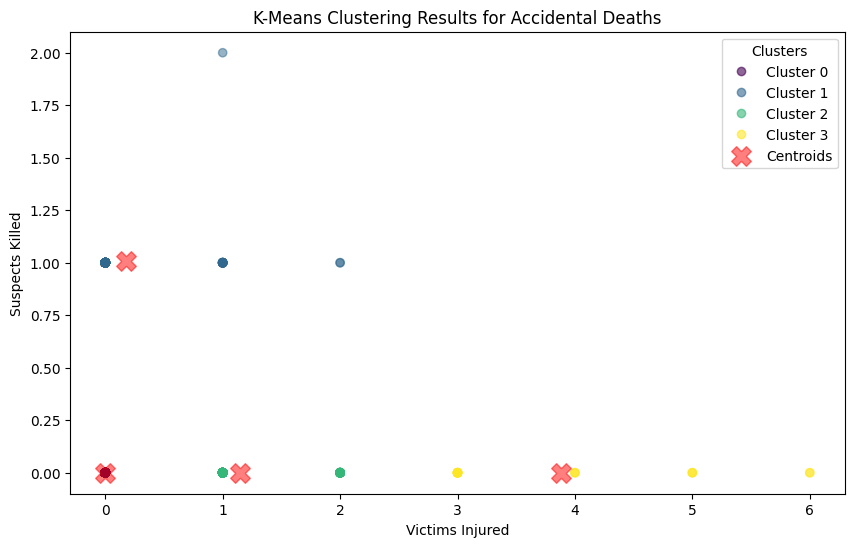

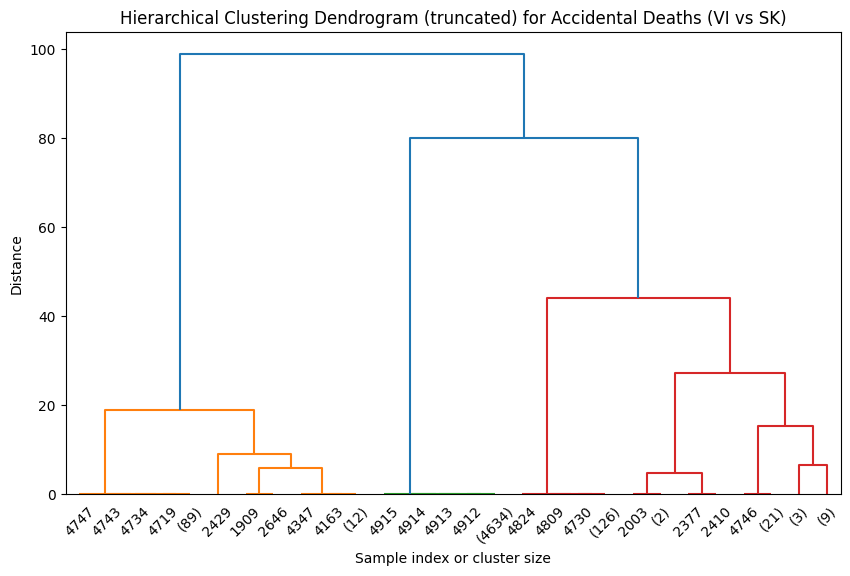

In [322]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VI_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VI vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VI_SK.png')
plt.show()

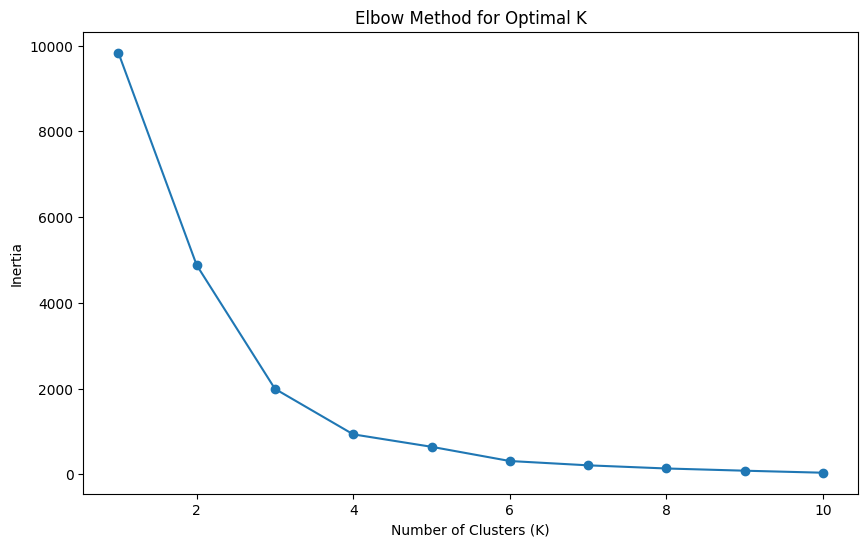

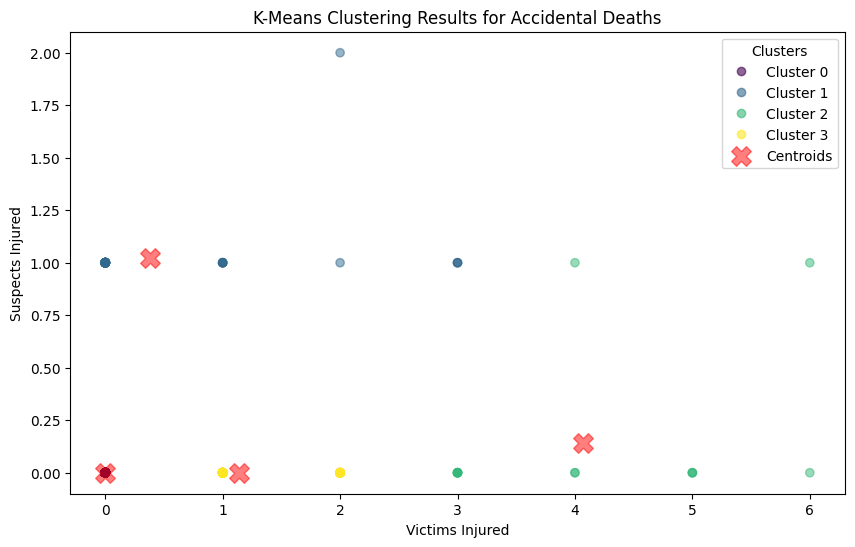

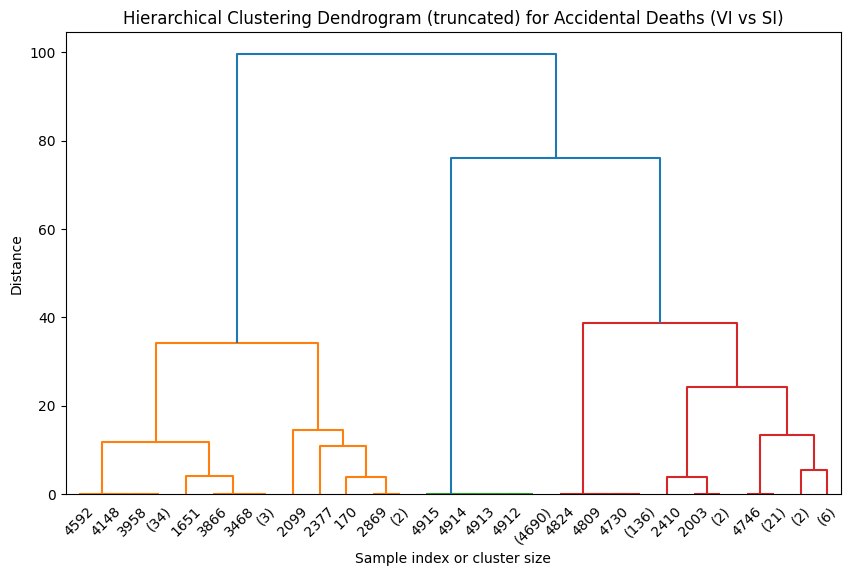

In [323]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VI_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VI vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VI_SI.png')
plt.show()

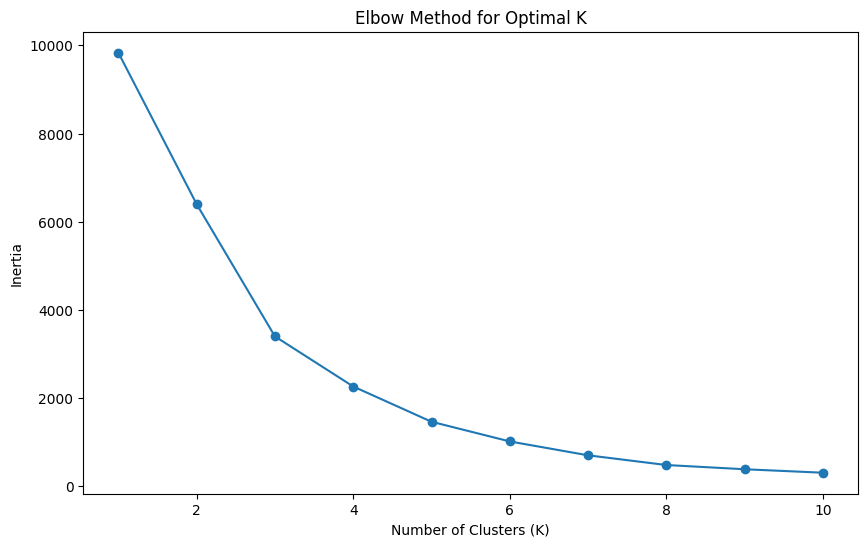

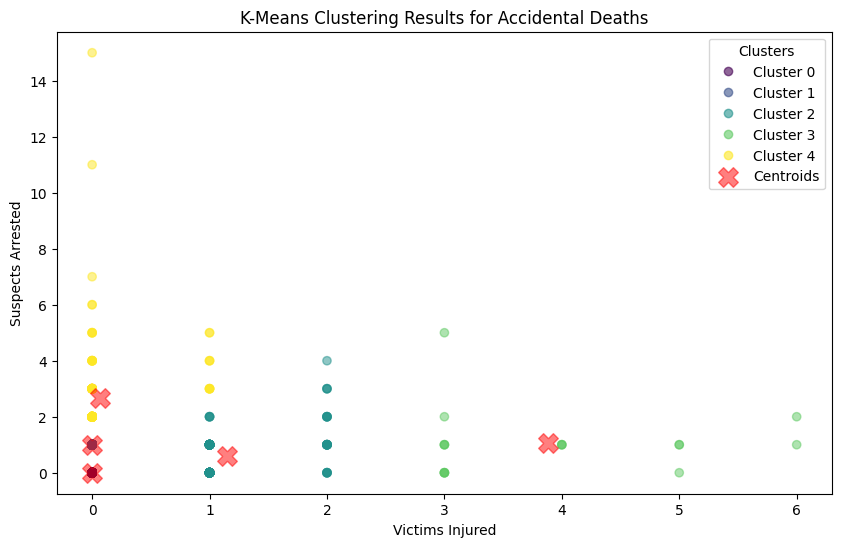

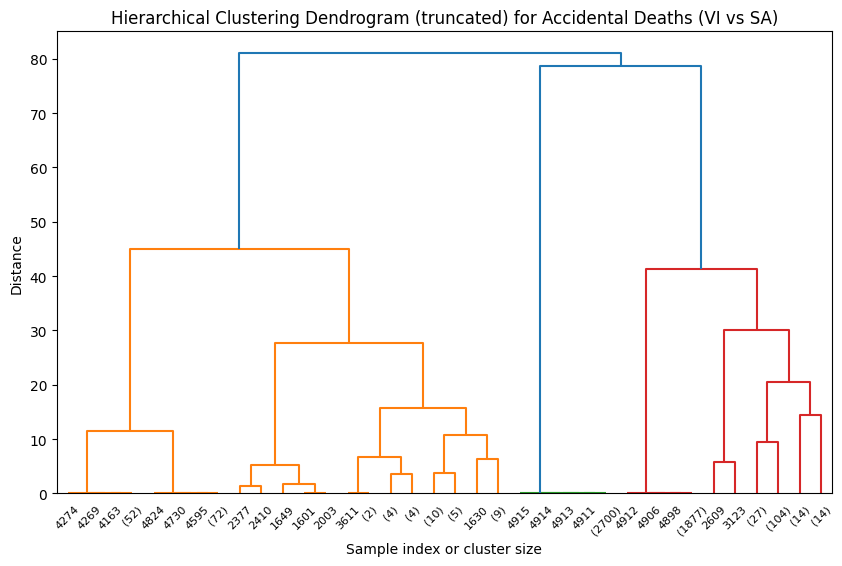

In [324]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Accidental Deaths')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_death_VI_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Deaths (VI vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_death_hc_VI_SA.png')
plt.show()

#### Accidental Injuries

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


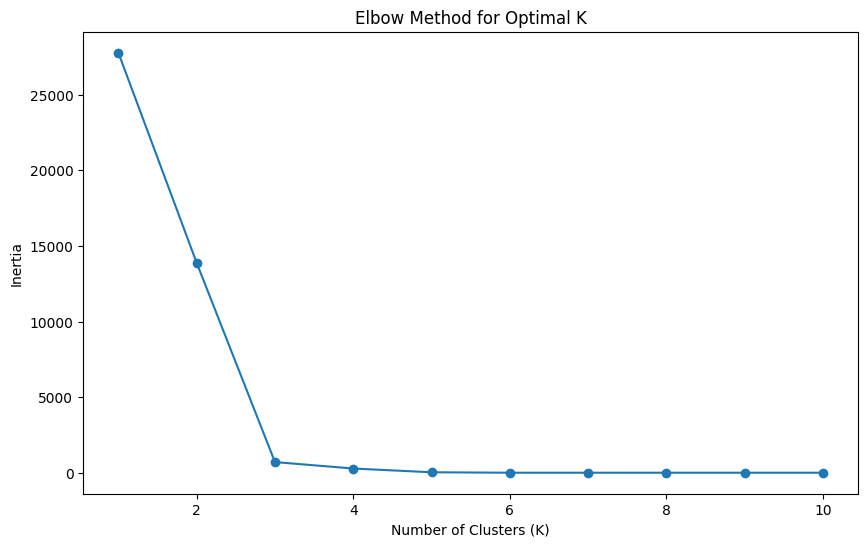

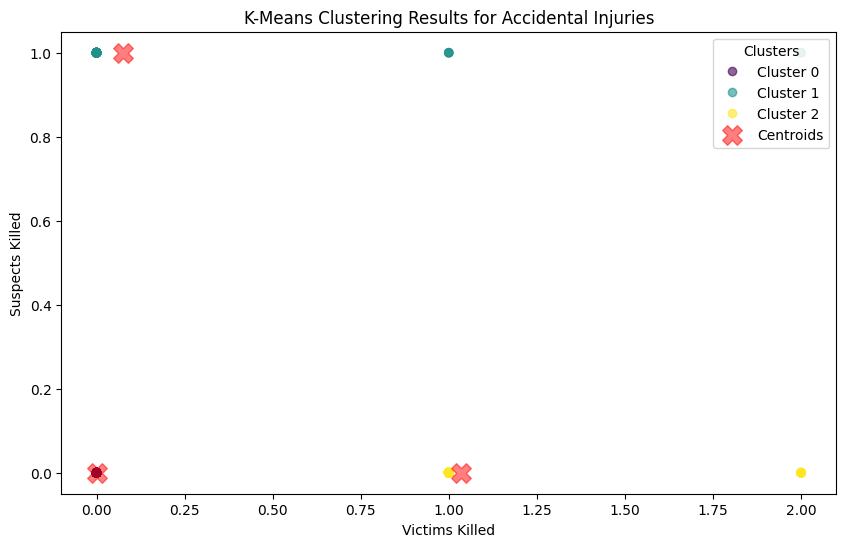

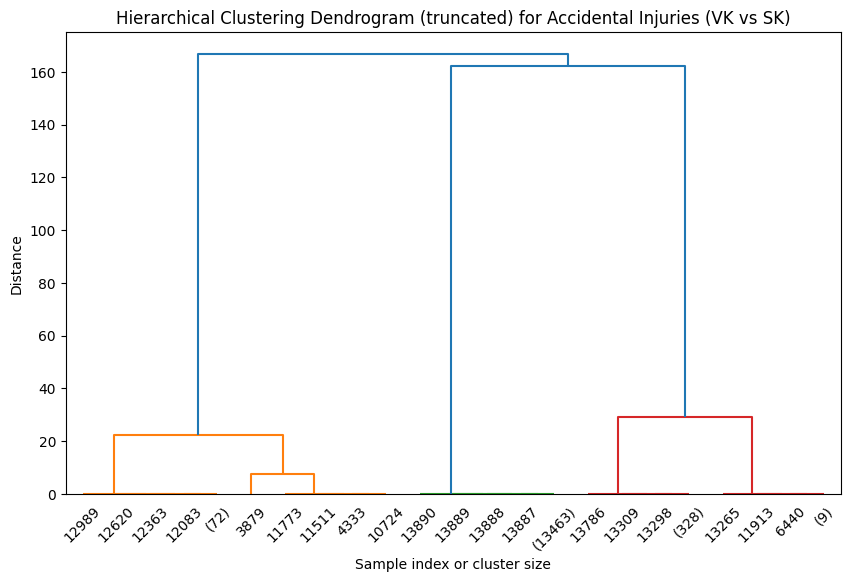

In [325]:
df = pd.read_csv("gunviolencearchive_accidental_injuries.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Accidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VK_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VK vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VK_SK.png')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


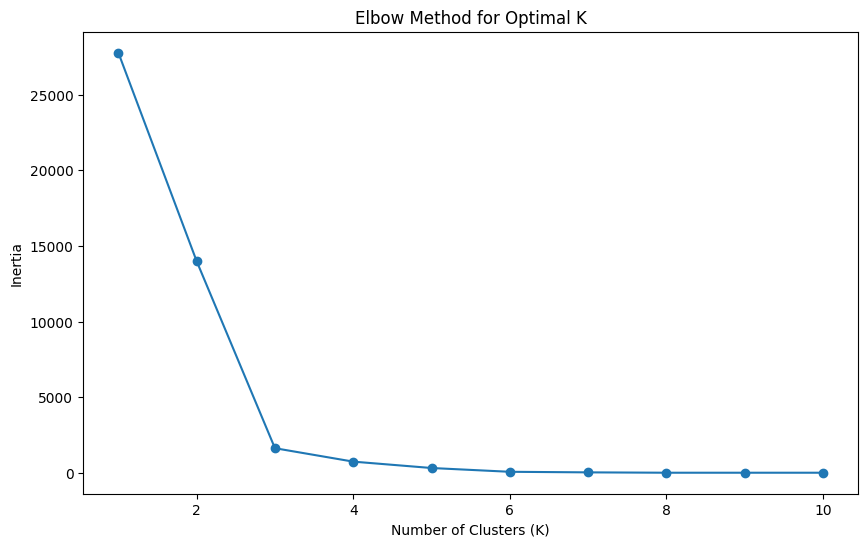

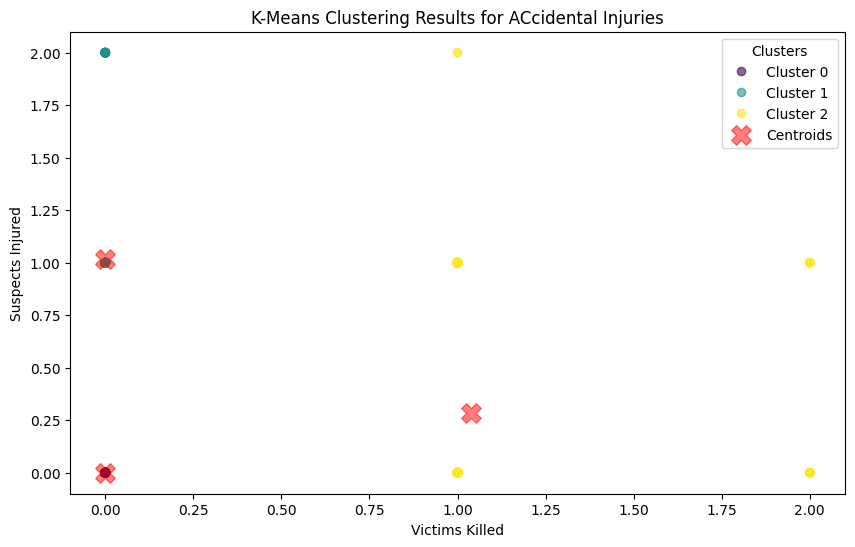

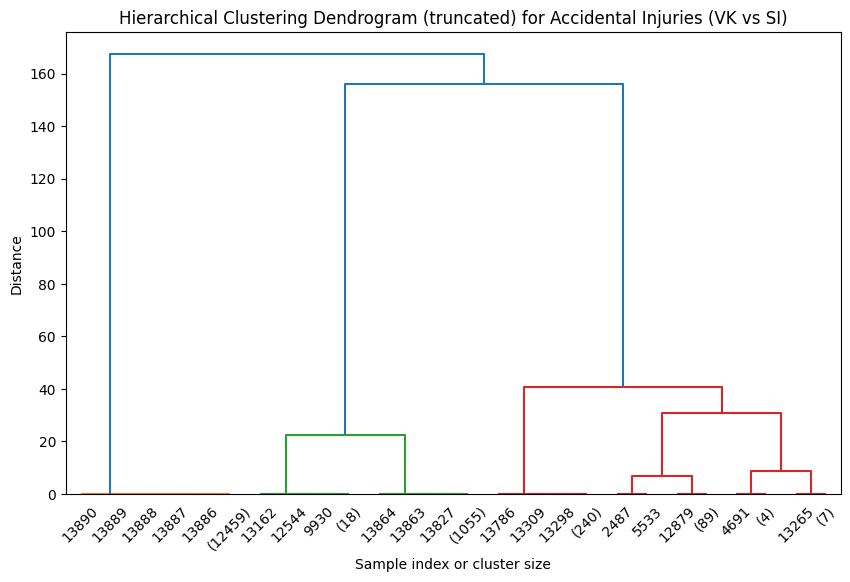

In [326]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for ACcidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VK_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VK vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VK_SI.png')
plt.show()

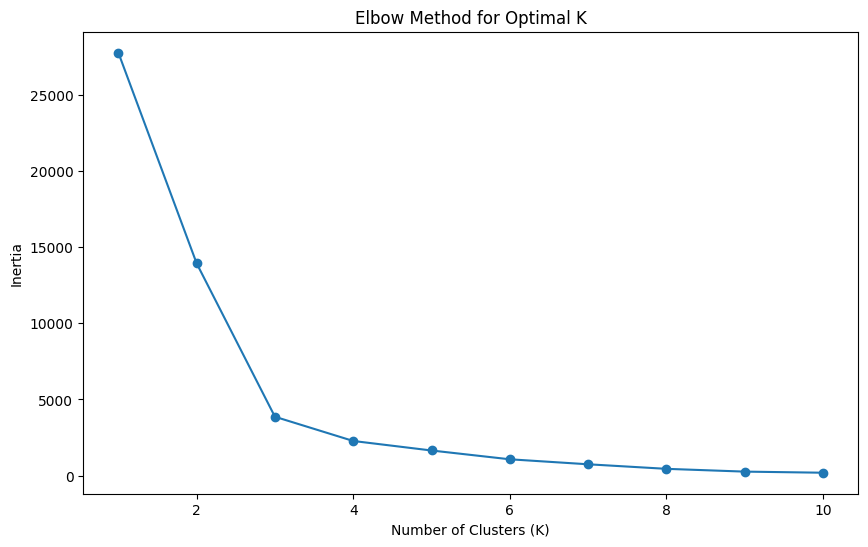

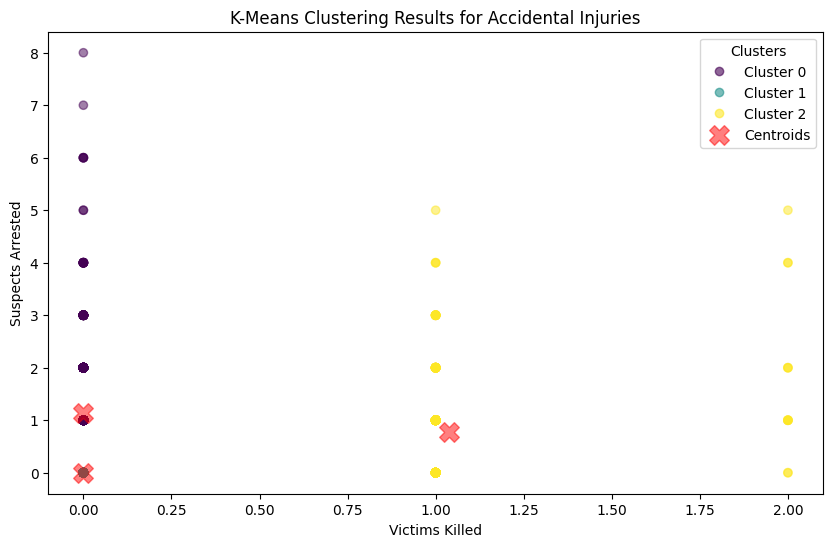

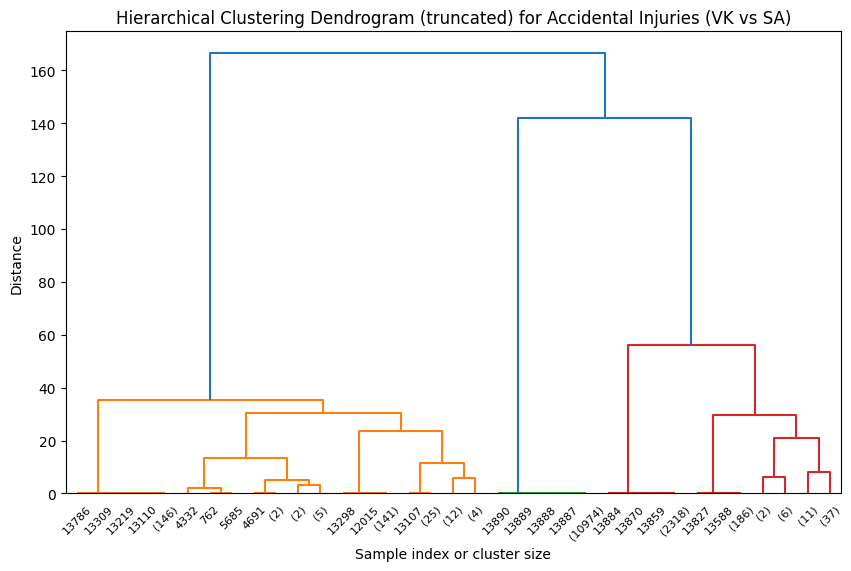

In [327]:
scaled_data = scaler.fit_transform(df[['Victims Killed', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Killed'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Killed')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Accidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VK_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VK vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VK_SA.png')
plt.show()

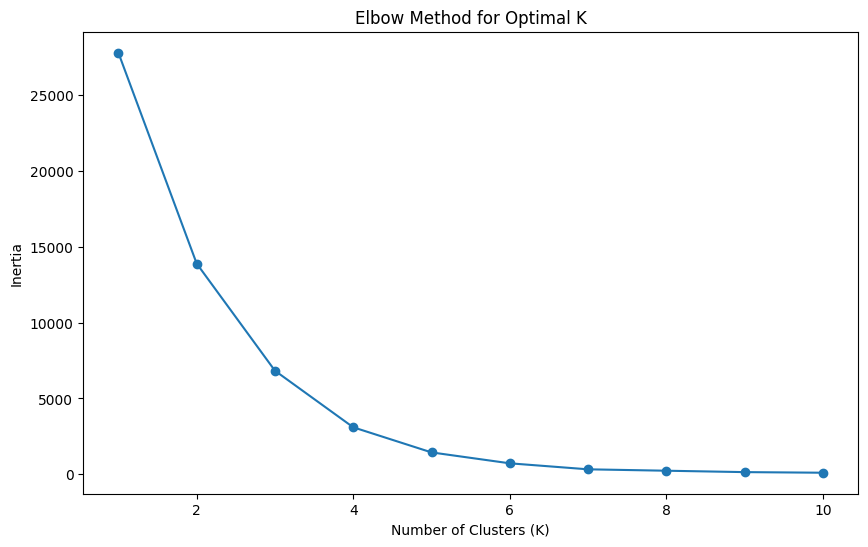

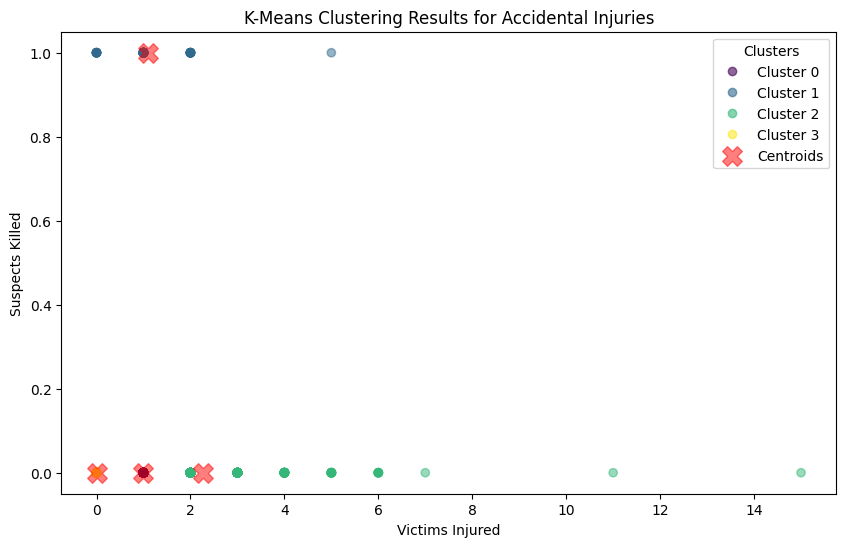

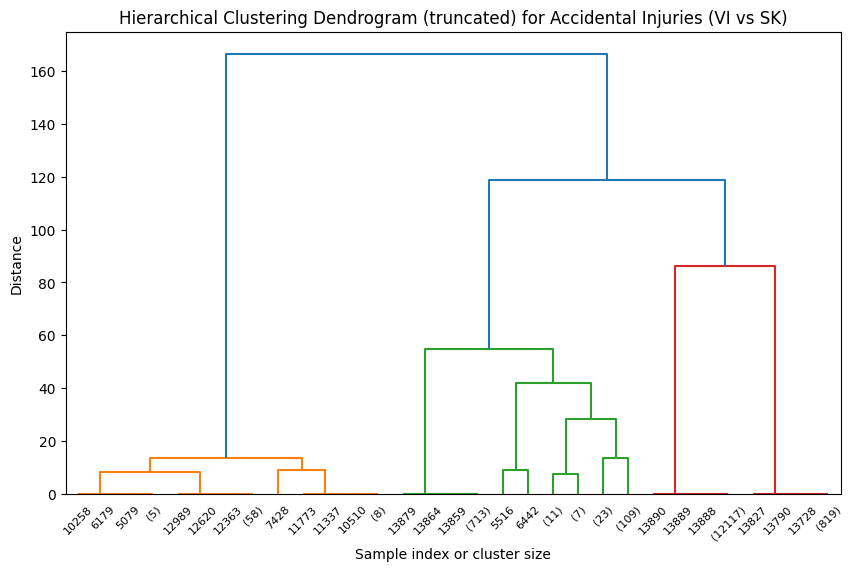

In [328]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Killed']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Killed'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Killed')
plt.title('K-Means Clustering Results for Accidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VI_SK.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VI vs SK)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VI_SK.png')
plt.show()

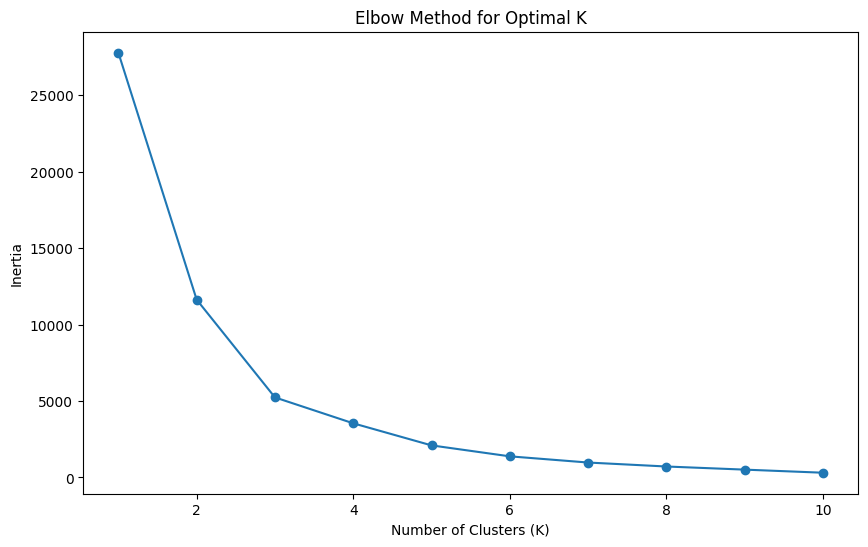

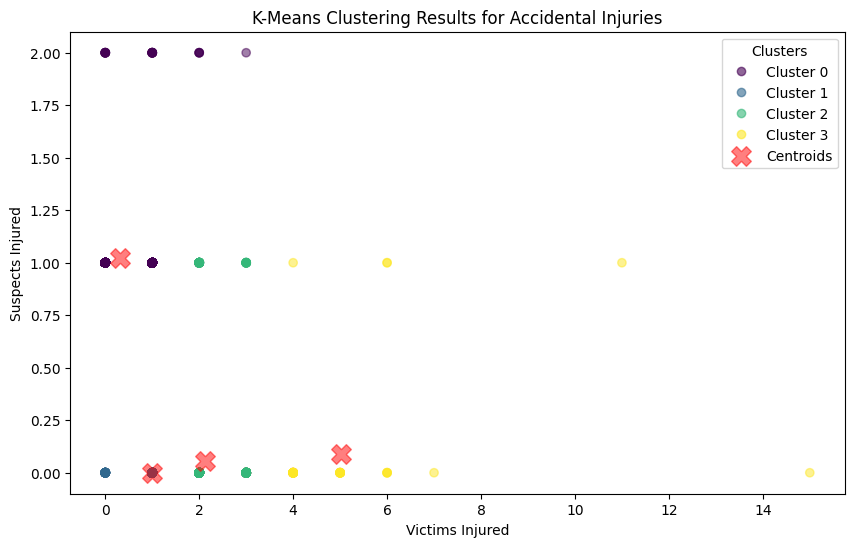

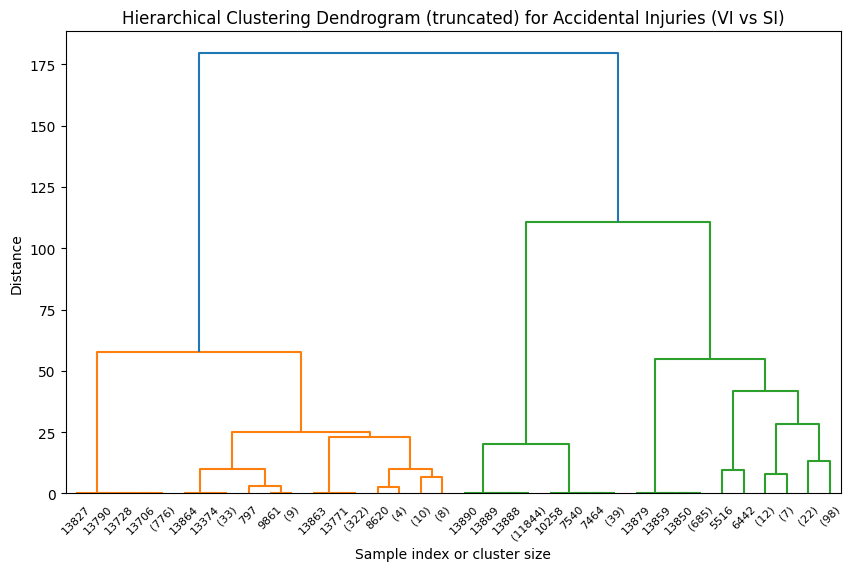

In [329]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Injured']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Injured'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Injured')
plt.title('K-Means Clustering Results for Accidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VI_SI.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VI vs SI)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VI_SI.png')
plt.show()

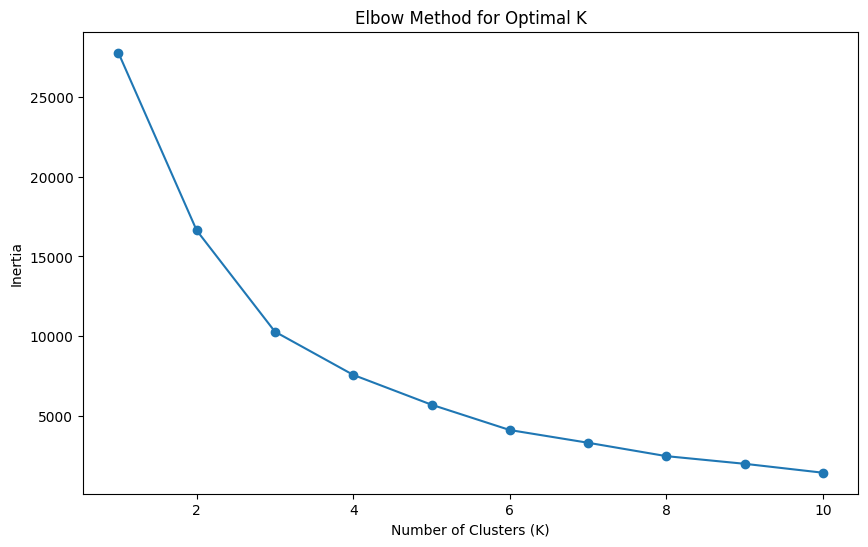

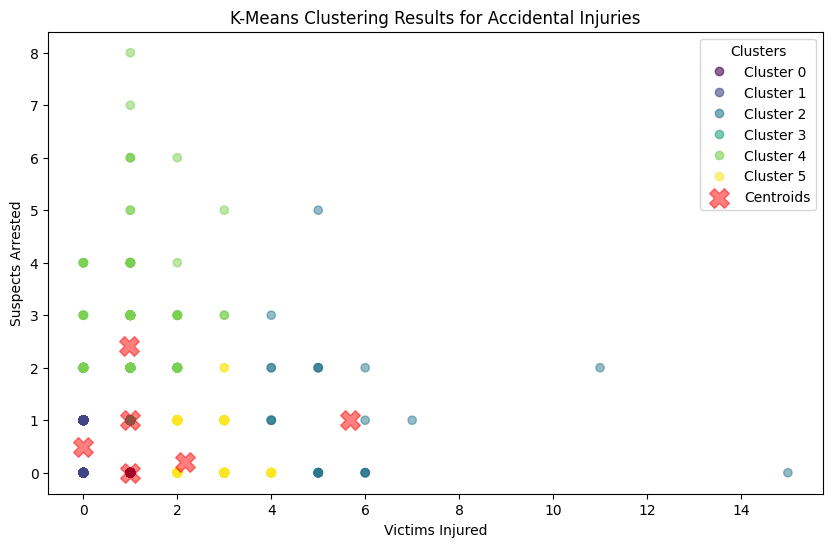

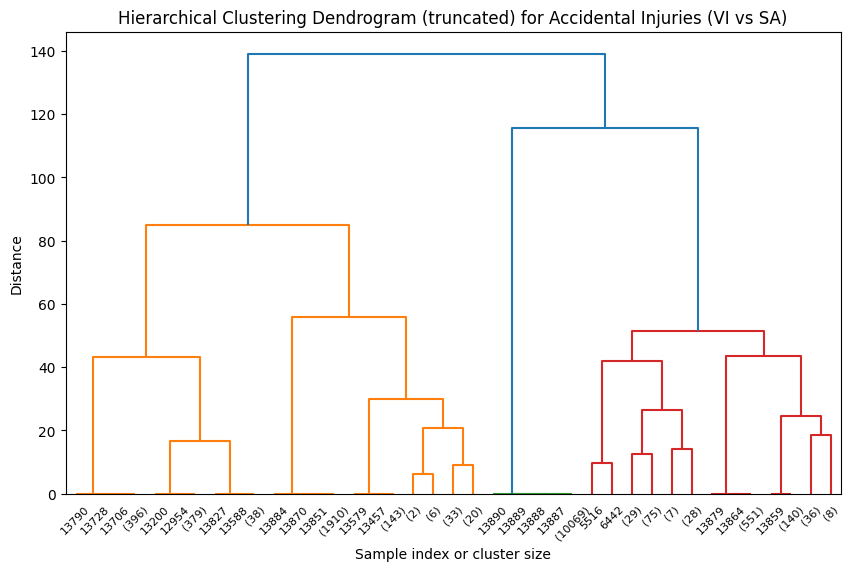

In [330]:
scaled_data = scaler.fit_transform(df[['Victims Injured', 'Suspects Arrested']])
inertia = []
for k in range(1, 11): # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 6 # Based on Elbow Method or domain knowledge
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
df['cluster_label'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Victims Injured'], df['Suspects Arrested'], c=df['cluster_label'], cmap='viridis', alpha=0.5)
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', alpha=0.5)

plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('K-Means Clustering Results for Accidental Injuries')
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
cluster_legend = [f"Cluster {i}" for i in range(optimal_k)]
handles.append(centroid_scatter)
cluster_legend.append("Centroids")
plt.legend(handles, cluster_legend, title="Clusters", loc="upper right")
plt.savefig('../recourses/img/plots/acc_inj_VI_SA.png')
plt.show()

# --- 3) Dendrogram (see hierarchical structure) ---
plt.figure(figsize=(10,6))
linked = linkage(scaled_data, method="ward")   # Ward’s method minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated) for Accidental Injuries (VI vs SA)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.savefig('../recourses/img/plots/acc_inj_hc_VI_SA.png')
plt.show()